In [1]:
#!pip install pycountry_convert

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('dark_background')
print('Import the librarys successfully')

Import the librarys successfully


In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
print('Read File successfully')

Read File successfully


In [4]:
# Filter the data
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

In [5]:
#View fist few row
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [6]:
#View fist few row
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [7]:
#View fist few row
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

In [8]:
#View last few row
confirmed_df.tail()

Province/State        Country/Region        Lat        Long  1/22/20  \
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  \
284        0        0        0        0        0  ...   316088   316189   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     7012     7022   
287        0        0        0        0        0  ...   192316   192956   
288        0        0        0        0        0  ...    99944   101711   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
284   316328   316487   316603   316738  316861  317083  317264  317404  
285        0        0        0        0       0       0       0       0  
286     7027     7042     7058     7061    7070    7081    7086    7096  
287   193432   194140   195096   195816  196293  196490  197123  197791  
288   103567   105656   107490   108860  109546  110855  112435  113526  

[5 rows x 565 columns]

In [9]:
#View last few row
deaths_df.tail()

Province/State        Country/Region        Lat        Long  1/22/20  \
284            NaN    West Bank and Gaza  31.952200   35.233200        0   
285            NaN  Winter Olympics 2022  39.904200  116.407400        0   
286            NaN                 Yemen  15.552727   48.516388        0   
287            NaN                Zambia -13.133897   27.849332        0   
288            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  \
284        0        0        0        0        0  ...     3599     3600   
285        0        0        0        0        0  ...        0        0   
286        0        0        0        0        0  ...     1373     1374   
287        0        0        0        0        0  ...     3295     3316   
288        0        0        0        0        0  ...     3173     3280   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
284     3601     3601     3601     3603    3604    3609    3609    3609  
285        0        0        0        0       0       0       0       0  
286     1374     1374     1375     1375    1377    1378    1380    1380  
287     3338     3355     3376     3389    3406    3412    3422    3430  
288     3340     3421     3490     3532    3583    3635    3676    3711  

[5 rows x 565 columns]

In [10]:
#View last few row
recoveries_df.tail()

Province/State        Country/Region        Lat        Long  1/22/20  \
269            NaN    West Bank and Gaza  31.952200   35.233200        0   
270            NaN  Winter Olympics 2022  39.904200  116.407400        0   
271            NaN                 Yemen  15.552727   48.516388        0   
272            NaN                Zambia -13.133897   27.849332        0   
273            NaN              Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  \
269        0        0        0        0        0  ...   311526   311560   
270        0        0        0        0        0  ...        0        0   
271        0        0        0        0        0  ...     4166     4168   
272        0        0        0        0        0  ...   182665   183534   
273        0        0        0        0        0  ...    67827    70496   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
269   311622   311714   311772   311832  311918  312149  312289  312320  
270        0        0        0        0       0       0       0       0  
271     4168     4171     4171     4185    4200    4212    4232    4251  
272   183957   185210   186211   187236  188106  188950  189341  189658  
273    71383    73394    74562    75856   76665   79420   81570   82994  

[5 rows x 565 columns]

In [11]:
#View Dimentions
print(f"Dimension of confirmed_df: {confirmed_df.shape}")
print(f"Dimension of deaths_df: {deaths_df.shape}")
print(f"Dimension of recoveries_df: {recoveries_df.shape}")

Dimension of confirmed_df: (289, 565)
Dimension of deaths_df: (289, 565)
Dimension of recoveries_df: (274, 565)


# Tổng quan về dữ liệu
 - Tập dữ liệu gồm 3 bộ(Confirmed, Deaths, Recoveries) là thống kê tình hình dịch bệnh covid ở các quốc gia và sự kiện lớn trên toàn thế giới.
 - **Đây là dữ liệu tích lũy, có nghĩa là dữ liệu trong 1 cột là tổng số ca tính đến ngày hôm đó chứ không phải là tổng số ca của ngày hôm đó.**
 - Các thống kê bao gồm số người nhiễm bệnh, số người tử vong và số người hồi phục tương ứng với các quốc gia và các sự kiện lớn trên toàn thế giới và được tích lũy theo ngày.
 - Nhìn tổng quan dữ liệu ta thấy dữ liệu đang hợp lý về mặt logic khi số ca xác nhận mắc bệnh đang lớn hơn tổng số ca tử vong + số ca hồi phục tính theo từng quốc gia theo từng mốc thời  gian. Số ca nhiễm, tử vong, hồi phục của ngày sau luôn lớn hơn ngày trước đó như vậy là phù hợp về trình tự logic.
 - Cột `Province/State` đang chứa nhiều giá trị NaN, điều này có thể lý giải ban đầu là do có nhiều quốc gia thống kê dữ liệu theo từng tỉnh, nhưng có nhiều quốc gia thì chỉ thống kê dữ liệu theo quốc gia mà thôi hoặc họ chưa cập nhật. Vì vậy giá trị NaN này cũng có ý nghĩa khi phân tích dữ liệu.
 - Dữ liệu có 289 dòng và 565 cột thuộc cỡ dữ liệu small size
 - Riêng bộ Recoveries chỉ có 274 dòng và 565 cột( ít hơn số dòng của 2 file confirmed và deaths là 289 dòng) lý do chưa xác định.
     Có thể có 1 số quốc gia này họ không tiết lộ thông tin hoặc chưa cập nhật tình trạng hồi phục bệnh.
 - Chúng ta có thể phân loại các cột trong 3 tập dữ liệu như sau:
     + Các cột thuộc loại địa lý: `Province/State`, `Country/Region`, `Lat`, `Long` => Tổng 4 cột
     + Các cột thuộc loại số lượng: Bao gồm các cột còn lại: => 565 - 4 = 561 cột     

# Chuẩn hóa tên cột

In [12]:
#Check columns name
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/26/21', '7/27/21', '7/28/21', '7/29/21', '7/30/21', '7/31/21',
       '8/1/21', '8/2/21', '8/3/21', '8/4/21'],
      dtype='object', length=565)

In [13]:
#Check columns name
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/26/21', '7/27/21', '7/28/21', '7/29/21', '7/30/21', '7/31/21',
       '8/1/21', '8/2/21', '8/3/21', '8/4/21'],
      dtype='object', length=565)

In [14]:
#Check columns name
recoveries_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/26/21', '7/27/21', '7/28/21', '7/29/21', '7/30/21', '7/31/21',
       '8/1/21', '8/2/21', '8/3/21', '8/4/21'],
      dtype='object', length=565)

In [15]:
#Clear excess blank in the columns name
confirmed_df.columns = [cols.strip() for cols in confirmed_df.columns]
deaths_df.columns = [cols.strip() for cols in deaths_df.columns]
recoveries_df.columns = [cols.strip() for cols in recoveries_df.columns]
print('Clear excess blank in the columns name successfully')

Clear excess blank in the columns name successfully


In [16]:
#recheck
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [17]:
#Check columns type
deaths_df.columns.dtype

dtype('O')

### Comments
**Tên cột ở 3 khung dữ liệu đã được chuẩn hóa theo 1 chuẩn, tất cả đang ở dạng chuỗi str, chắc chắn không có khoảng trắng thừa ở đầu và cuối, các chữ được ngăn cách bởi dấu "/"**

# Kiểm tra và chuẩn hóa kiểu dữ liệu của từng cột

In [18]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


In [19]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


In [20]:
recoveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


In [21]:
confirmed_df.select_dtypes('object').head(2)

Province/State Country/Region
0            NaN    Afghanistan
1            NaN        Albania

In [22]:
confirmed_df.select_dtypes('float').head(2)

Lat       Long
0  33.93911  67.709953
1  41.15330  20.168300

In [23]:
confirmed_df.select_dtypes('int').head(2)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  \
0        0        0  ...   144285   145008   145552   145996   146523   
1        0        0  ...   132891   132922   132952   132999   133036   

   7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   147154  147501  147985  148572  148933  
1   133081  133121  133146  133211  133310  

[2 rows x 561 columns]

### Comments
**Các kiểu dữ liệu của từng cột đã phù hợp với bài toán thực tế.**

`Province/State`, `Country/Region` : object

`Lat`, `Long`: float

`1/22/20` -> `8/4/21`: int

# Check missing data

In [24]:
#Check missing data
print(f"confirmed_df:\n {confirmed_df.isnull().sum()}")
print(f"deaths_df:\n {deaths_df.isnull().sum()}")
print(f"recoveries_df:\n {recoveries_df.isnull().sum()}")

confirmed_df:
 Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
7/31/21             0
8/1/21              0
8/2/21              0
8/3/21              0
8/4/21              0
Length: 565, dtype: int64
deaths_df:
 Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
7/31/21             0
8/1/21              0
8/2/21              0
8/3/21              0
8/4/21              0
Length: 565, dtype: int64
recoveries_df:
 Province/State    199
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
7/31/21             0
8/1/21              0
8/2/21              0
8/3/21              0
8/4/21              0
Length: 565, dtype: int64


### Comments
- Chúng ta nhận thấy 3 bộ dữ liệu có 1 số giá trị bị khuyết thiếu ở 2 cột `Lat` và `Long`

- Cột `Province/State` chứa nhiều giá trị NaN: Có thể 1 số quốc gia có lưu trữ thông tin theo toàn quốc, còn 1 số quốc gia thì lưu thông tin theo thành phố. Vì vậy ta xác định các giá trị NaN này có ý nghĩa khi làm phân tích dữ liệu.

- Chúng ta cũng nhận thấy có sự không khớp giữa số lượng các giá trị NaN của các cột `Province/State` của 3 bộ dữ liệu, cụ thể:
  + Cột `Province/State` của 2 bộ dữ liệu confirmed_df và deaths_df là: 198 giá trị NaN
  + Cột `Province/State` của bộ dữ liệu recoveries_df là: 199 giá trị NaN
- Có thể chúng ta cần làm 1 vài phân tích sâu hơn để xem 1 đơn vị lệch này là quốc gia nào và vấn đề là gì?


### Kiểm tra và xử lý 2 cột Lat, Long

In [25]:
mask_confirmed = confirmed_df['Lat'].isnull()
confirmed_df[mask_confirmed]

Province/State Country/Region  Lat  Long  1/22/20  1/23/20  \
53  Repatriated Travellers         Canada  NaN   NaN        0        0   
89                 Unknown          China  NaN   NaN        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
53        0        0        0        0  ...       13       13       13   
89        0        0        0        0  ...    10222    10232    10240   

    7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
53       13       13       13      13      13      13      13  
89    10252    10275    10291   10324   10377   10414   10421  

[2 rows x 565 columns]

In [26]:
mask_deaths = deaths_df['Lat'].isnull()
deaths_df[mask_deaths]

Province/State Country/Region  Lat  Long  1/22/20  1/23/20  \
53  Repatriated Travellers         Canada  NaN   NaN        0        0   
89                 Unknown          China  NaN   NaN        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
53        0        0        0        0  ...        0        0        0   
89        0        0        0        0  ...      197      198      198   

    7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
53        0        0        0       0       0       0       0  
89      198      198      199     199     199     199     199  

[2 rows x 565 columns]

In [27]:
mask_recoveries = recoveries_df['Lat'].isnull()
recoveries_df[mask_recoveries]

Province/State Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
74        Unknown          China  NaN   NaN        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  7/29/21  \
74        0        0        0  ...        4        6        7        7   

    7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
74        0        0       0       0       0       0  

[1 rows x 565 columns]

In [28]:
confirmed_df.loc[confirmed_df['Country/Region'] == 'China', ['Province/State', 'Country/Region', 'Lat', 'Long']]

Province/State Country/Region      Lat      Long
59           Anhui          China  31.8257  117.2264
60         Beijing          China  40.1824  116.4142
61       Chongqing          China  30.0572  107.8740
62          Fujian          China  26.0789  117.9874
63           Gansu          China  35.7518  104.2861
64       Guangdong          China  23.3417  113.4244
65         Guangxi          China  23.8298  108.7881
66         Guizhou          China  26.8154  106.8748
67          Hainan          China  19.1959  109.7453
68           Hebei          China  39.5490  116.1306
69    Heilongjiang          China  47.8620  127.7615
70           Henan          China  37.8957  114.9042
71       Hong Kong          China  22.3000  114.2000
72           Hubei          China  30.9756  112.2707
73           Hunan          China  27.6104  111.7088
74  Inner Mongolia          China  44.0935  113.9448
75         Jiangsu          China  32.9711  119.4550
76         Jiangxi          China  27.6140  115.7221
77           Jilin          China  43.6661  126.1923
78        Liaoning          China  41.2956  122.6085
79           Macau          China  22.1667  113.5500
80         Ningxia          China  37.2692  106.1655
81         Qinghai          China  35.7452   95.9956
82         Shaanxi          China  35.1917  108.8701
83        Shandong          China  36.3427  118.1498
84        Shanghai          China  31.2020  121.4491
85          Shanxi          China  37.5777  112.2922
86         Sichuan          China  30.6171  102.7103
87         Tianjin          China  39.3054  117.3230
88           Tibet          China  31.6927   88.0924
89         Unknown          China      NaN       NaN
90        Xinjiang          China  41.1129   85.2401
91          Yunnan          China  24.9740  101.4870
92        Zhejiang          China  29.1832  120.0934

In [29]:
confirmed_df.loc[confirmed_df['Country/Region'] == 'Canada', ['Province/State', 'Country/Region', 'Lat', 'Long']]

Province/State Country/Region      Lat      Long
40                    Alberta         Canada  53.9333 -116.5765
41           British Columbia         Canada  53.7267 -127.6476
42           Diamond Princess         Canada   0.0000    0.0000
43             Grand Princess         Canada   0.0000    0.0000
44                   Manitoba         Canada  53.7609  -98.8139
45              New Brunswick         Canada  46.5653  -66.4619
46  Newfoundland and Labrador         Canada  53.1355  -57.6604
47      Northwest Territories         Canada  64.8255 -124.8457
48                Nova Scotia         Canada  44.6820  -63.7443
49                    Nunavut         Canada  70.2998  -83.1076
50                    Ontario         Canada  51.2538  -85.3232
51       Prince Edward Island         Canada  46.5107  -63.4168
52                     Quebec         Canada  52.9399  -73.5491
53     Repatriated Travellers         Canada      NaN       NaN
54               Saskatchewan         Canada  52.9399 -106.4509
55                      Yukon         Canada  64.2823 -135.0000

### Comments
- Tại 2 bộ dữ liệu **confirmed_df** và **deaths_df** thì 2 dữ liệu khuyết thiếu tại 2 cột `Lat`, `Long` là 2 quốc gia `Canada` và `China`
- Tại bộ **Recoveries_df** dữ liệu khuyết thiếu tại 2 cột Lat, Long là `China`
- `Canada` và `China` đều là 2 quốc gia lưu trữ thông tin về Covid theo thành phố, những giá trị khuyết thiếu là 1 trong số các thành phố mà họ chưa kịp cập nhật tại 2 cột `Lat`, `Long`.
- Nhận thấy thông tin tại 2 cột Lat, Long là thông tin về địa lý sẽ cần sử dụng đến khi phân tích dữ liệu, trực quan hóa.
- Tuy nhiên trong trường hợp này chúng ta không cần xử lý ngay missing data này lý do:
   + Khi chúng ta trực quan hóa thì những quốc gia lưu thông tin theo thành phố sẽ được lấy kinh độ và vĩ độ đại diện(lấy giá trị first line hoặc lấy giá trị mean để đại diện cho quốc gia đó).
   + Khi đó những thông tin missing data này sẽ không ảnh hưởng đến quá trình phân tích và trực quan hóa.
   + Chúng ta chỉ cần xử lý ngay dữ liệu missing ở 2 cột `Lat`, `Long` này khi những quốc gia bị missing data này lưu thông tin theo toàn quốc, nghĩa là chúng ta sẽ không có bất kỳ thông tin `Lat`, `Long` nào của quốc gia này.

### 1) Xác định ngày đầu tiên và ngày cuối cùng bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.

In [30]:
confirmed_df_first_date = confirmed_df.columns[4]
confirmed_df_last_date = confirmed_df.columns[-1]
deaths_df_first_date = deaths_df.columns[4]
deaths_df_last_date = deaths_df.columns[-1]
recoveries_df_first_date = recoveries_df.columns[4]
recoveries_df_last_date = recoveries_df.columns[-1]
print(f"Ngày đầu tiên bắt đầu lưu trữ ca nhiễm bệnh: {confirmed_df_first_date}")
print(f"Ngày cuối cùng bắt đầu lưu trữ ca nhiễm bệnh: {confirmed_df_last_date}")
print(f"Ngày đầu tiên bắt đầu lưu trữ ca tử vong: {deaths_df_first_date}")
print(f"Ngày cuối cùng bắt đầu lưu trữ ca tử vong: {deaths_df_last_date}")
print(f"Ngày đầu tiên bắt đầu lưu trữ ca hồi phục: {recoveries_df_first_date}")
print(f"Ngày cuối cùng bắt đầu lưu trữ ca hồi phục: {recoveries_df_last_date}")

Ngày đầu tiên bắt đầu lưu trữ ca nhiễm bệnh: 1/22/20
Ngày cuối cùng bắt đầu lưu trữ ca nhiễm bệnh: 8/4/21
Ngày đầu tiên bắt đầu lưu trữ ca tử vong: 1/22/20
Ngày cuối cùng bắt đầu lưu trữ ca tử vong: 8/4/21
Ngày đầu tiên bắt đầu lưu trữ ca hồi phục: 1/22/20
Ngày cuối cùng bắt đầu lưu trữ ca hồi phục: 8/4/21


### Comments
**Cả 3 bộ dữ liệu đều có ngày đầu tiên lưu trữ là `22/01/2020` và ngày cuối cùng là `04/08/2021`**

### 2) Xác định có bao nhiêu quốc gia trong dữ liệu này.

In [31]:
confirmed_df_Conutry = confirmed_df['Country/Region'].nunique()
deaths_df_Conutry = deaths_df['Country/Region'].nunique()
recoveries_df_Conutry = recoveries_df['Country/Region'].nunique()
print(f"Số quốc gia lưu trữ số ca mắc Covid: {confirmed_df_Conutry}")
print(f"Số quốc gia lưu trữ số ca tử vong do Covid: {deaths_df_Conutry}")
print(f"Số quốc gia lưu trữ số ca hồi phục sau khi mắc Covid: {recoveries_df_Conutry}")

Số quốc gia lưu trữ số ca mắc Covid: 201
Số quốc gia lưu trữ số ca tử vong do Covid: 201
Số quốc gia lưu trữ số ca hồi phục sau khi mắc Covid: 201


### Comments
**Cả 3 bộ dữ liệu đều có 201 quốc gia lưu trữ dữ liệu về Covid**

### 3) Tính tổng số ngày có trong 3 bộ dữ liệu.

In [32]:
confirmed_df_total_day = len(confirmed_df.columns) - 4
deaths_df_total_day = len(deaths_df.columns) - 4
recoveries_df_total_day = len(recoveries_df.columns) - 4
print(f"Tổng số ngày lưu trữ số ca mắc Covid: {confirmed_df_total_day}")
print(f"Tổng số ngày lưu trữ số ca tử vong do Covid: {deaths_df_total_day}")
print(f"Tổng số ngày lưu trữ số ca hồi phục sau khi mắc Covid: {recoveries_df_total_day}")

Tổng số ngày lưu trữ số ca mắc Covid: 561
Tổng số ngày lưu trữ số ca tử vong do Covid: 561
Tổng số ngày lưu trữ số ca hồi phục sau khi mắc Covid: 561


**Cả 3 bộ dữ liệu đều có tổng số 561 ngày lưu trữ dữ liệu về Covid**

### 4) Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [33]:
confirmed_df_dup = confirmed_df.duplicated().sum()
deaths_df_dup = deaths_df.duplicated().sum()
recoveries_df_dup = recoveries_df.duplicated().sum()
print(f"Tổng số dữ liệu bị trùng lặp của confirmed_df: {confirmed_df_dup}")
print(f"Tổng số dữ liệu bị trùng lặp của deaths_df: {deaths_df_dup}")
print(f"Tổng số dữ liệu bị trùng lặp của recoveries_df: {recoveries_df_dup}")

Tổng số dữ liệu bị trùng lặp của confirmed_df: 0
Tổng số dữ liệu bị trùng lặp của deaths_df: 0
Tổng số dữ liệu bị trùng lặp của recoveries_df: 0


### Comments
**Không tồn tại dữ liệu trùng lặp trong 3 bộ dữ liệu, các dòng trong 3 bộ dữ liệu đều là duy nhất**

### 5) Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.

In [34]:
confirmed_countries_no_province = confirmed_df.loc[confirmed_df['Province/State'].isna(), 'Country/Region'].unique()
deaths_countries_no_province = deaths_df.loc[deaths_df['Province/State'].isna(), 'Country/Region'].unique()
recoveries_countries_no_province = recoveries_df.loc[recoveries_df['Province/State'].isna(), 'Country/Region'].unique()
print(f"Tổng số Các quốc gia lưu trữ ca nhiễm bệnh theo toàn quốc chứ không theo từng thành phố: {len(confirmed_countries_no_province)}\n\n {confirmed_countries_no_province}\n")
print(f"Tổng số Các quốc gia lưu trữ ca tử vong theo toàn quốc chứ không theo từng thành phố: {len(deaths_countries_no_province)}\n\n {deaths_countries_no_province}\n")
print(f"Tổng số Các quốc gia lưu trữ ca hồi phục theo toàn quốc chứ không theo từng thành phố: {len(recoveries_countries_no_province)}\n\n {recoveries_countries_no_province}")

Tổng số Các quốc gia lưu trữ ca nhiễm bệnh theo toàn quốc chứ không theo từng thành phố: 198

 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'Ind

### 6) Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.

In [35]:
confirmed_countries_with_province = confirmed_df[~confirmed_df['Province/State'].isna()]['Country/Region'].unique()
deaths_countries_with_province = deaths_df[~deaths_df['Province/State'].isna()]['Country/Region'].unique()
recoveries_countries_with_province = recoveries_df[~recoveries_df['Province/State'].isna()]['Country/Region'].unique()
print(f"Các quốc gia lưu trữ ca nhiễm bệnh được lưu trữ theo thành phố: {len(confirmed_countries_with_province)}\n\n {confirmed_countries_with_province}\n")
print(f"Các quốc gia lưu trữ ca tử vong được lưu trữ theo thành phố: {len(deaths_countries_with_province)}\n\n {deaths_countries_with_province}\n")
print(f"Các quốc gia lưu trữ ca hồi phục được lưu trữ theo thành phố: {len(recoveries_countries_with_province)}\n\n {recoveries_countries_with_province}")

Các quốc gia lưu trữ ca nhiễm bệnh được lưu trữ theo thành phố: 8

 ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands'
 'New Zealand' 'United Kingdom']

Các quốc gia lưu trữ ca tử vong được lưu trữ theo thành phố: 8

 ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands'
 'New Zealand' 'United Kingdom']

Các quốc gia lưu trữ ca hồi phục được lưu trữ theo thành phố: 7

 ['Australia' 'China' 'Denmark' 'France' 'Netherlands' 'New Zealand'
 'United Kingdom']


### Comments

**Chúng ta thấy giao nhau giữa 3 bộ kết quả chính là `Canada`, đây là quốc gia lưu trữ thông tin người mắc bệnh và tử vong theo thành phố nhưng chỉ lưu thông tin người hồi phục theo toàn quốc chứ không theo từng thành phố. Đây là nguyên nhân dẫn tới việc có 1 đơn vị bị lệch trong 3 bộ kết quả của cột `Province/State` mà chúng ta nhắc tới bên trên.**

In [36]:
# recheck Canada on confirmed_df
confirmed_df.loc[confirmed_df['Country/Region'] == 'Canada', 'Province/State':'Long']

Province/State Country/Region      Lat      Long
40                    Alberta         Canada  53.9333 -116.5765
41           British Columbia         Canada  53.7267 -127.6476
42           Diamond Princess         Canada   0.0000    0.0000
43             Grand Princess         Canada   0.0000    0.0000
44                   Manitoba         Canada  53.7609  -98.8139
45              New Brunswick         Canada  46.5653  -66.4619
46  Newfoundland and Labrador         Canada  53.1355  -57.6604
47      Northwest Territories         Canada  64.8255 -124.8457
48                Nova Scotia         Canada  44.6820  -63.7443
49                    Nunavut         Canada  70.2998  -83.1076
50                    Ontario         Canada  51.2538  -85.3232
51       Prince Edward Island         Canada  46.5107  -63.4168
52                     Quebec         Canada  52.9399  -73.5491
53     Repatriated Travellers         Canada      NaN       NaN
54               Saskatchewan         Canada  52.9399 -106.4509
55                      Yukon         Canada  64.2823 -135.0000

In [37]:
# recheck Canada on deaths_df
deaths_df.loc[deaths_df['Country/Region'] == 'Canada', 'Province/State':'Long']

Province/State Country/Region      Lat      Long
40                    Alberta         Canada  53.9333 -116.5765
41           British Columbia         Canada  53.7267 -127.6476
42           Diamond Princess         Canada   0.0000    0.0000
43             Grand Princess         Canada   0.0000    0.0000
44                   Manitoba         Canada  53.7609  -98.8139
45              New Brunswick         Canada  46.5653  -66.4619
46  Newfoundland and Labrador         Canada  53.1355  -57.6604
47      Northwest Territories         Canada  64.8255 -124.8457
48                Nova Scotia         Canada  44.6820  -63.7443
49                    Nunavut         Canada  70.2998  -83.1076
50                    Ontario         Canada  51.2538  -85.3232
51       Prince Edward Island         Canada  46.5107  -63.4168
52                     Quebec         Canada  52.9399  -73.5491
53     Repatriated Travellers         Canada      NaN       NaN
54               Saskatchewan         Canada  52.9399 -106.4509
55                      Yukon         Canada  64.2823 -135.0000

In [38]:
# recheck Canada on recoveries_df
recoveries_df.loc[recoveries_df['Country/Region'] == 'Canada', 'Province/State':'Long']

Province/State Country/Region      Lat      Long
40            NaN         Canada  56.1304 -106.3468

### 7) Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.

In [39]:
# Lọc ra các cột chứa thông tin là các ca nhiễm bệnh
confirmed_case = confirmed_df.iloc[:, 4:].keys()

# Vì dữ liệu là dữ liệu tích lũy theo từng ngày, vì vậy phần chênh giữa một ngày và ngày hôm trước liền kề chính là số ca Covid nhiễm mới trong ngày hôm đó.\
#(sử dụng diff(axis = 1) để lấy phần chênh lệch giữa các cột liền kề.
confirmed_totals_by_country = confirmed_df.groupby('Country/Region')[confirmed_case].sum().diff(axis=1).fillna(0)

# Tìm ra tên quốc gia có số ca mắc covid trong 1 ngày lớn nhất
max_confirmed_by_country = confirmed_totals_by_country.max(axis = 1).sort_values(ascending = False).index[0]

# Tìm ra ngày có số ca mắc covid lớn nhất
max_confirmed_by_date = confirmed_totals_by_country.max(axis = 0).sort_values(ascending = False).index[0]

# Tìm ra số ca mắc covid trong 1 ngày lớn nhất
max_confirmed_by_cases = confirmed_totals_by_country.max(axis = 1).sort_values(ascending = False).iloc[0]

# In ra kết quả
print(f"Quốc gia: {max_confirmed_by_country}\nNgày: {max_confirmed_by_date}\nCó số ca mắc Covid nhiều nhất trên toàn thế giới với: {max_confirmed_by_cases} ca nhiễm mới")

Quốc gia: Turkey
Ngày: 12/10/20
Có số ca mắc Covid nhiều nhất trên toàn thế giới với: 823225.0 ca nhiễm mới


### Comments
**Vào ngày `10/12/2020` tại quốc gia `Turkey` có `823225` ca nhiễm mới là nhiều nhất trên thế giới**

### 8) Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.

In [40]:
# Lọc ra các cột chứa thông tin là các ca tử vong do Covid
deaths_case = deaths_df.iloc[:, 4:].keys()

# Vì đây là dữ liệu tích lũy vì vậy ngày cuối cùng chính là ngày chứa tổng số người tử vong.
deaths_totals_by_country = deaths_df.groupby('Country/Region')[deaths_case[-1]].sum().sort_values(ascending = False).index[0]
deaths_totals_by_cases = deaths_df.groupby('Country/Region')[deaths_case[-1]].sum().sort_values(ascending = False).iloc[0]
print(f"Quốc gia có số người tử vong do Covid nhiều nhất: {deaths_totals_by_country}\nSố người tử vong: {deaths_totals_by_cases}")

Quốc gia có số người tử vong do Covid nhiều nhất: US
Số người tử vong: 611222


### Comments
**Quốc gia có tổng số người tử vong do Covid là: `US`, với tổng cộng: `611222` người tử vong tính đến ngày `04/08/2021`**

### 9) Tính tổng số ca Covid, số ca tử vong, số ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

In [41]:
# Lọc ra các cột chứa thông tin là các ca bệnh
col = confirmed_df.iloc[:, 4:].keys()

# Tính tổng số ca Covid tại Việt Nam
case_vn = confirmed_df.groupby('Country/Region').sum().loc['Vietnam', col[-1]]

# Tính tổng số ca tử vong
deaths_vn = deaths_df.groupby('Country/Region').sum().loc['Vietnam', col[-1]]

# Tính tổng số ca hồi phục
recoveries_vn = recoveries_df.groupby('Country/Region').sum().loc['Vietnam', col[-1]]

#Tính tổng số ca Covid ở thời điểm hiện tại
active_vn = case_vn - deaths_vn - recoveries_vn

print(f"Tổng số ca Covid tại Việt Nam: {case_vn},\nTổng số ca tử vong do Covid tại Việt Nam: {deaths_vn},\n\
Tổng số ca hồi phục tại Việt Nam: {recoveries_vn},\nTổng số ca Covid còn ở thời điểm hiện tại: {active_vn}")

Tổng số ca Covid tại Việt Nam: 181756,
Tổng số ca tử vong do Covid tại Việt Nam: 2327,
Tổng số ca hồi phục tại Việt Nam: 54332,
Tổng số ca Covid còn ở thời điểm hiện tại: 125097


In [42]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

### Bài toán 1: Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [43]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:
for date in dates:
    total_cases.append(confirmed[date].sum())
    total_deaths.append(deaths[date].sum())
    total_recovered.append(recoveries[date].sum())
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])   
    
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


### Bài toán 2 : Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

In [44]:
# Create dataframe df_total incluted total_cases, deaths, recovered, active
df_total = pd.DataFrame({'total_cases' : total_cases,
                         'total_deaths' : total_deaths,
                         'total_recovered' : total_recovered,
                         'total_active' : total_active
})

df_total_log10 = pd.DataFrame({'total_cases' : np.log10(total_cases),
                               'total_deaths' : np.log10(total_deaths),
                               'total_recovered' : np.log10(total_recovered),
                               'total_active' : np.log10(total_active)
})
df_total_log10

total_cases  total_deaths  total_recovered  total_active
0       2.745855      1.230449         1.477121      2.707570
1       2.817565      1.255273         1.505150      2.783189
2       2.974972      1.414973         1.591065      2.943989
3       3.157457      1.623249         1.623249      3.131298
4       3.326336      1.748188         1.748188      3.302764
..           ...           ...              ...           ...
556     8.297519      6.628041         8.112957      7.809141
557     8.298575      6.628800         8.113925      7.810396
558     8.299821      6.629631         8.114870      7.812272
559     8.301200      6.630685         8.115883      7.814405
560     8.302674      6.631750         8.116937      7.816748

[561 rows x 4 columns]

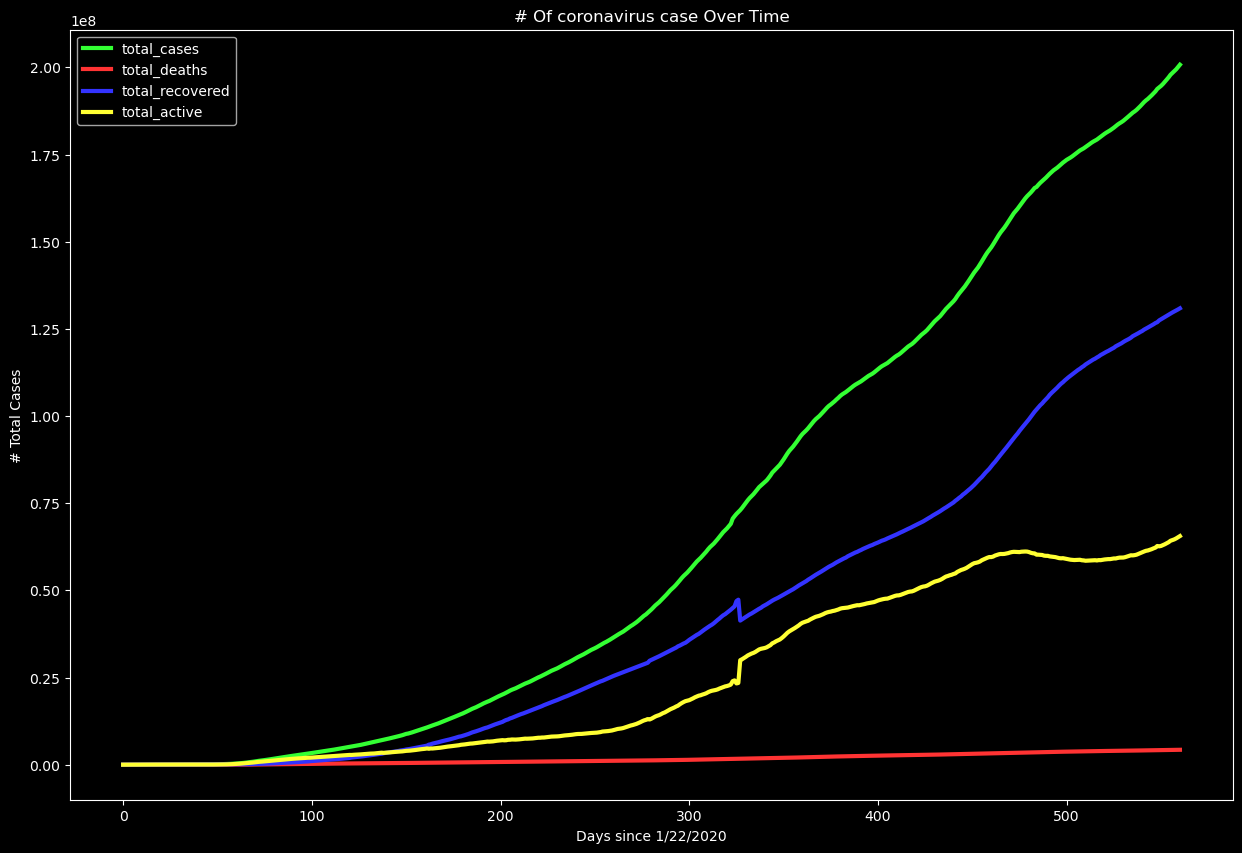

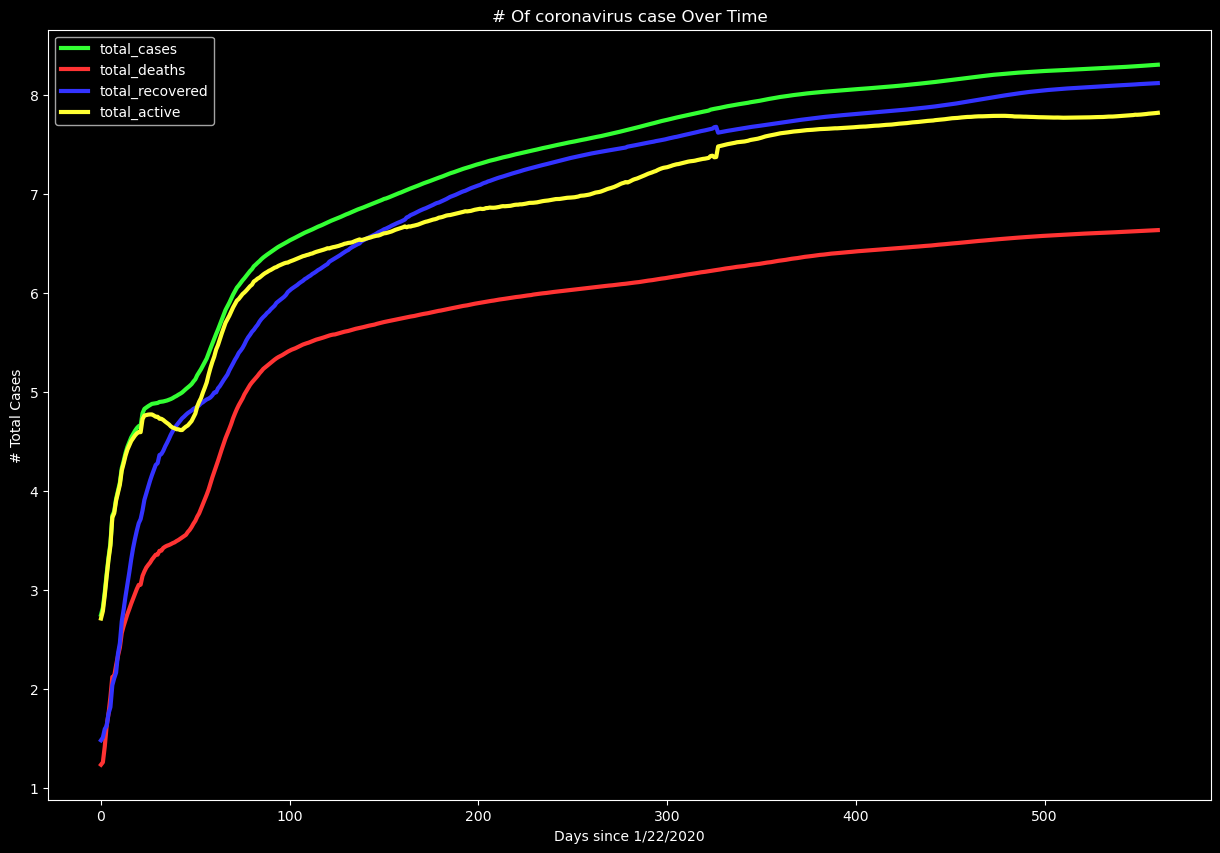

In [45]:
# Trực quan hóa
colors = ['#33ff33', "#ff3333", "#3333ff", "#ffff33"]

df_total.plot(kind = 'line', linewidth = 3, figsize = (15,10), color = colors)
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# Total Cases')

df_total_log10.plot(kind = 'line', linewidth = 3, figsize = (15,10), color = colors)
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# Total Cases')

plt.show()

### Bài toán 3: Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.


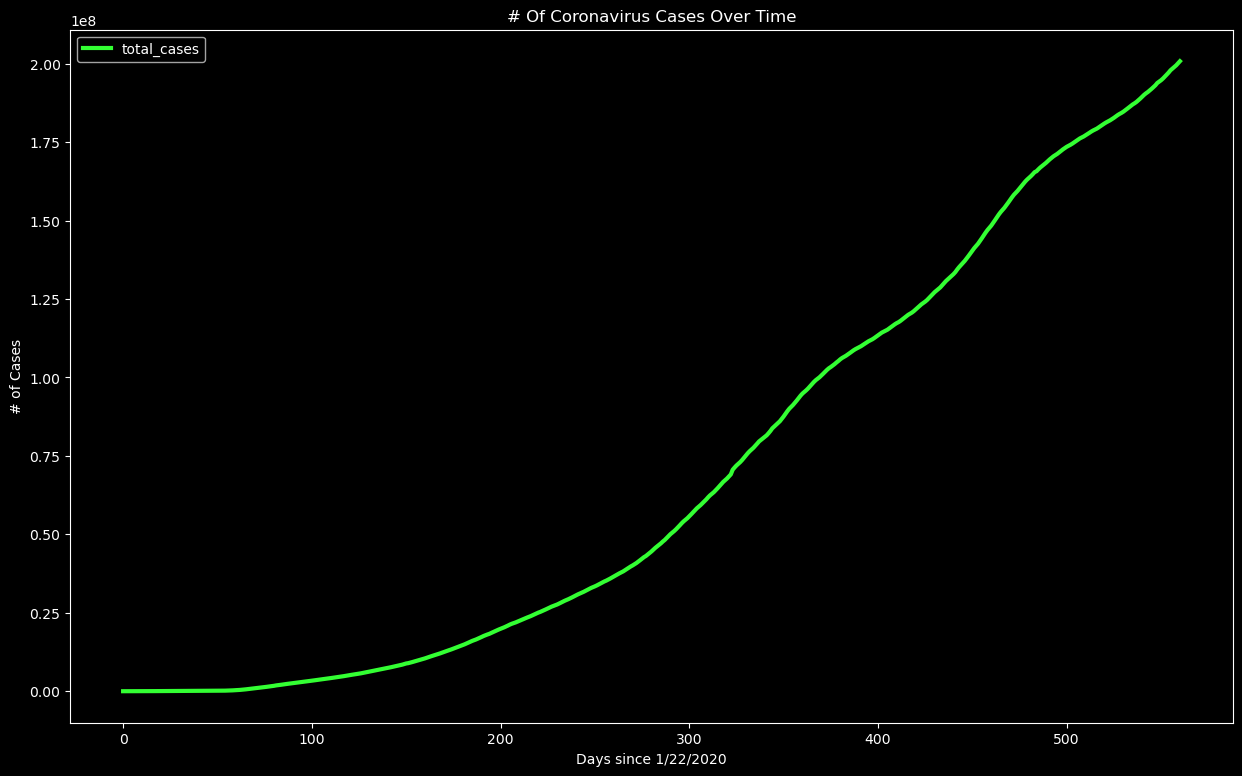

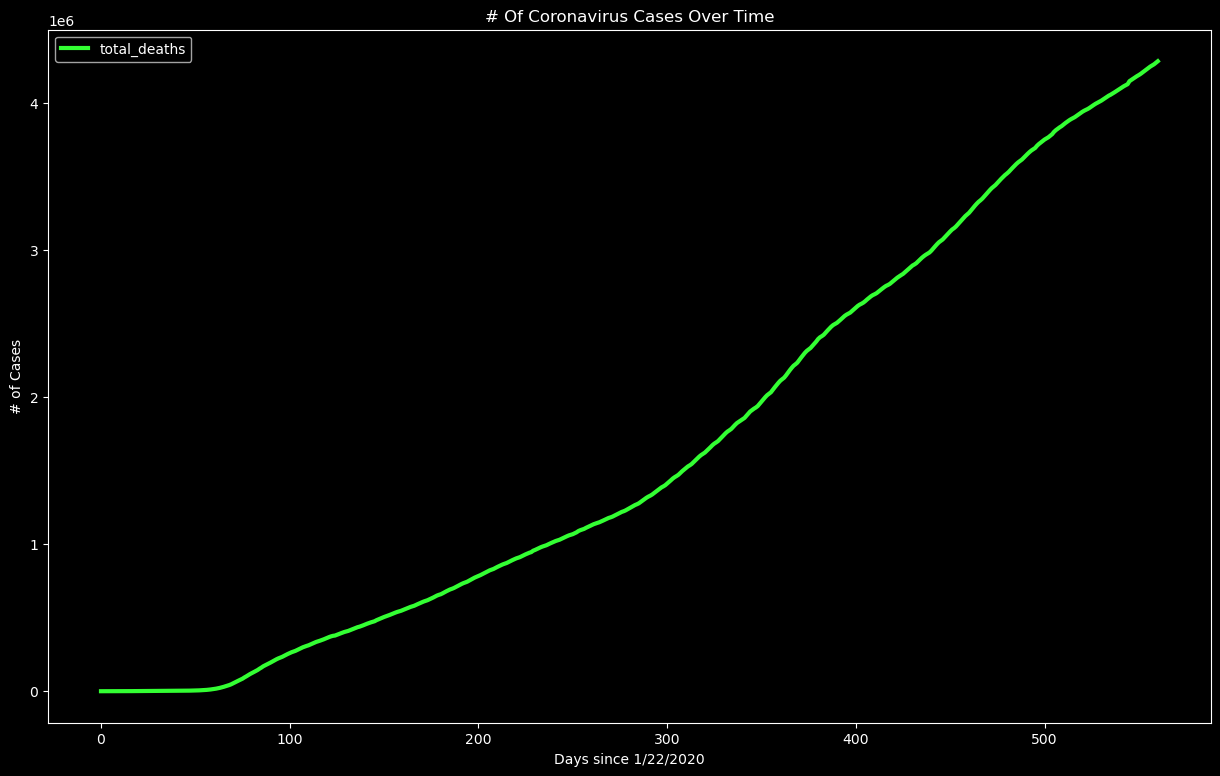

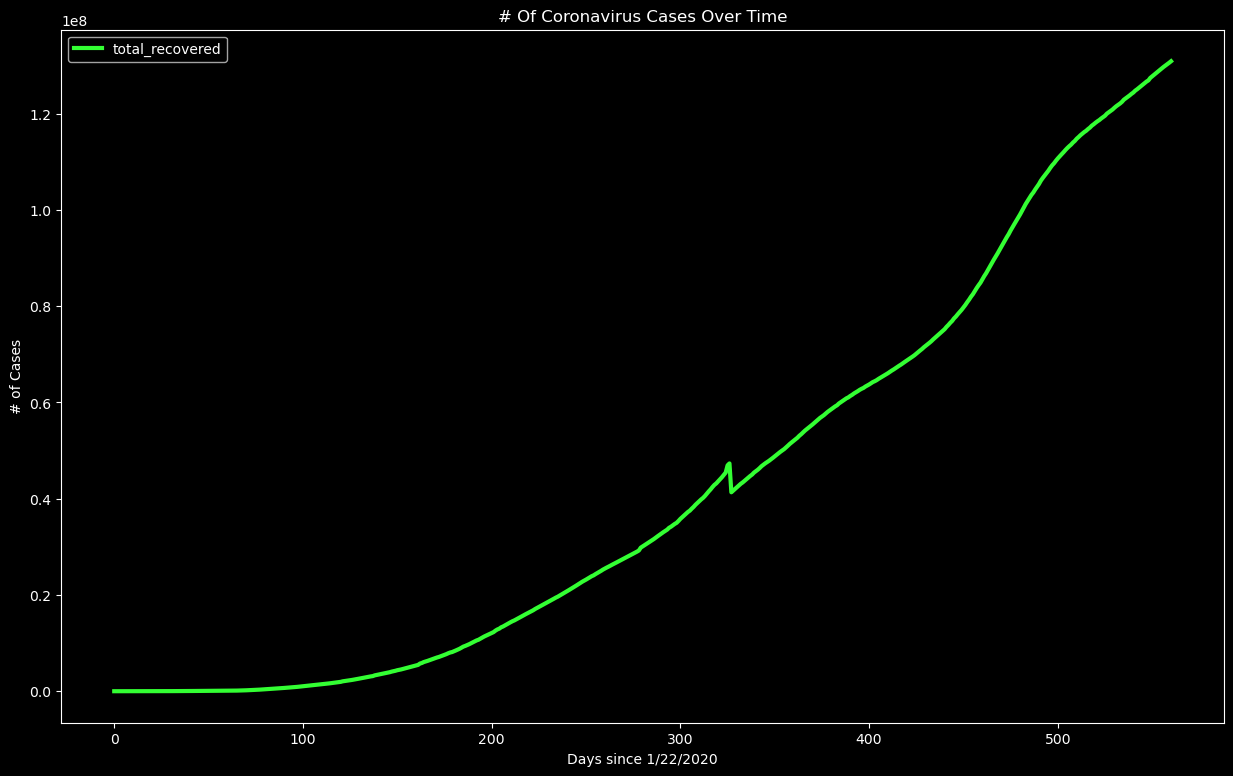

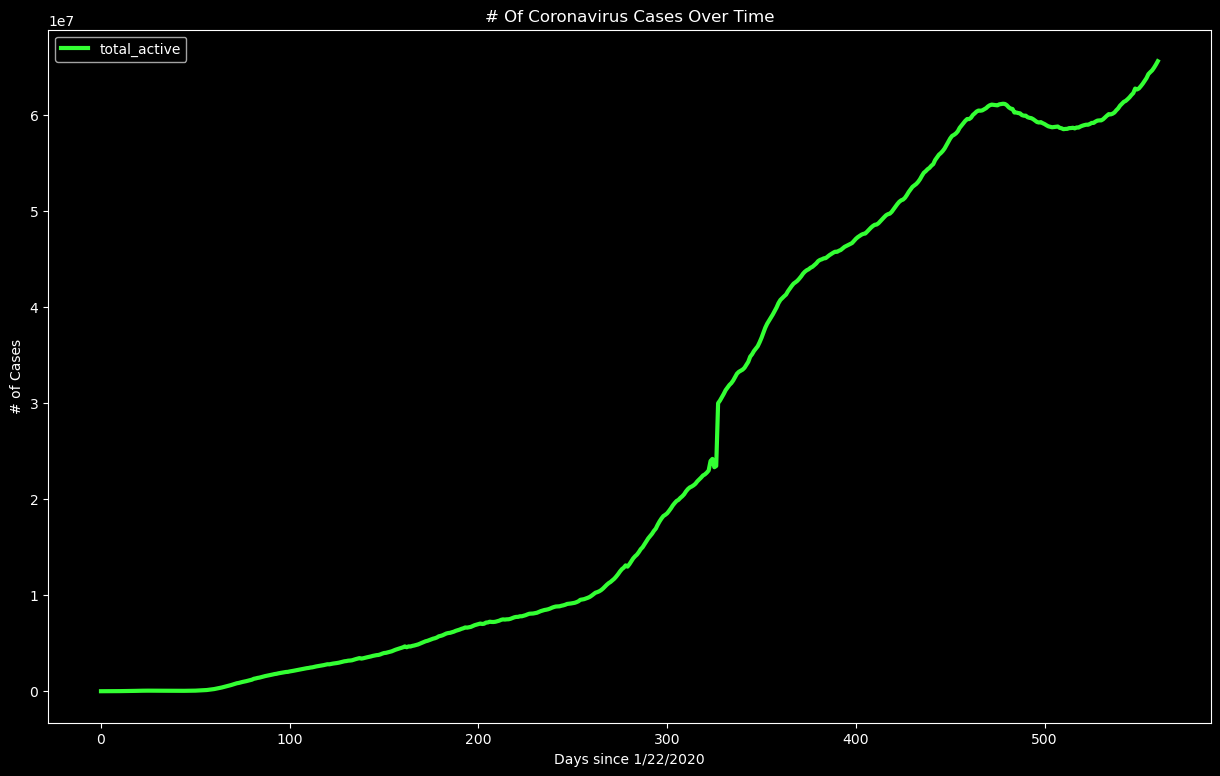

In [46]:
for col in df_total.columns:    
    df_total[col].plot(kind = 'line', linewidth = 3, color = '#33ff33', figsize = (15,9), label = col)
    plt.title('# Of Coronavirus Cases Over Time')
    plt.xlabel('Days since 1/22/2020')
    plt.ylabel('# of Cases')
    plt.legend()

    plt.show()

### Bài toán 4: Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [47]:
# Tính toán số lượng gia tăng hàng ngày
df_total_by_day = df_total.diff(axis = 0).fillna(0)
df_total_by_day

total_cases  total_deaths  total_recovered  total_active
0            0.0           0.0              0.0           0.0
1          100.0           1.0              2.0          97.0
2          287.0           8.0              7.0         272.0
3          493.0          16.0              3.0         474.0
4          683.0          14.0             14.0         655.0
..           ...           ...              ...           ...
556     517345.0        8844.0         303929.0      204572.0
557     483068.0        7419.0         289178.0      186471.0
558     571103.0        8151.0         283144.0      279808.0
559     634275.0       10353.0         304468.0      319454.0
560     680458.0       10492.0         317060.0      352906.0

[561 rows x 4 columns]

### Bài toán 5: Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

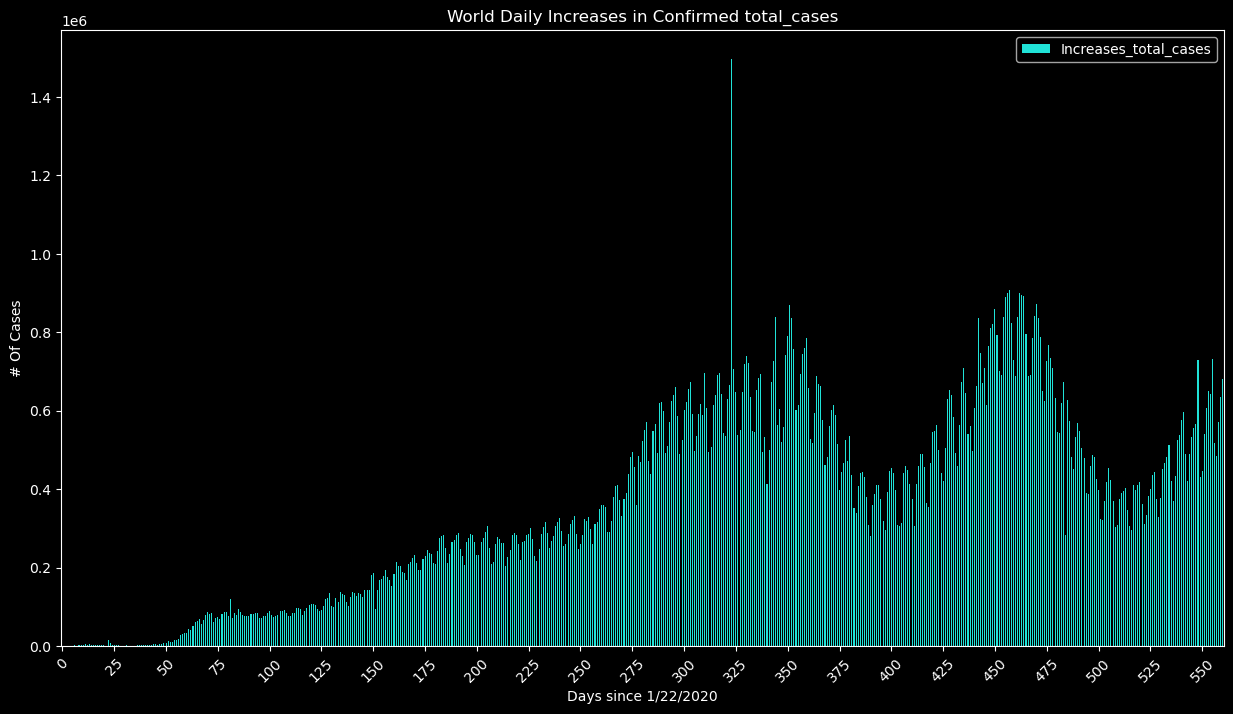

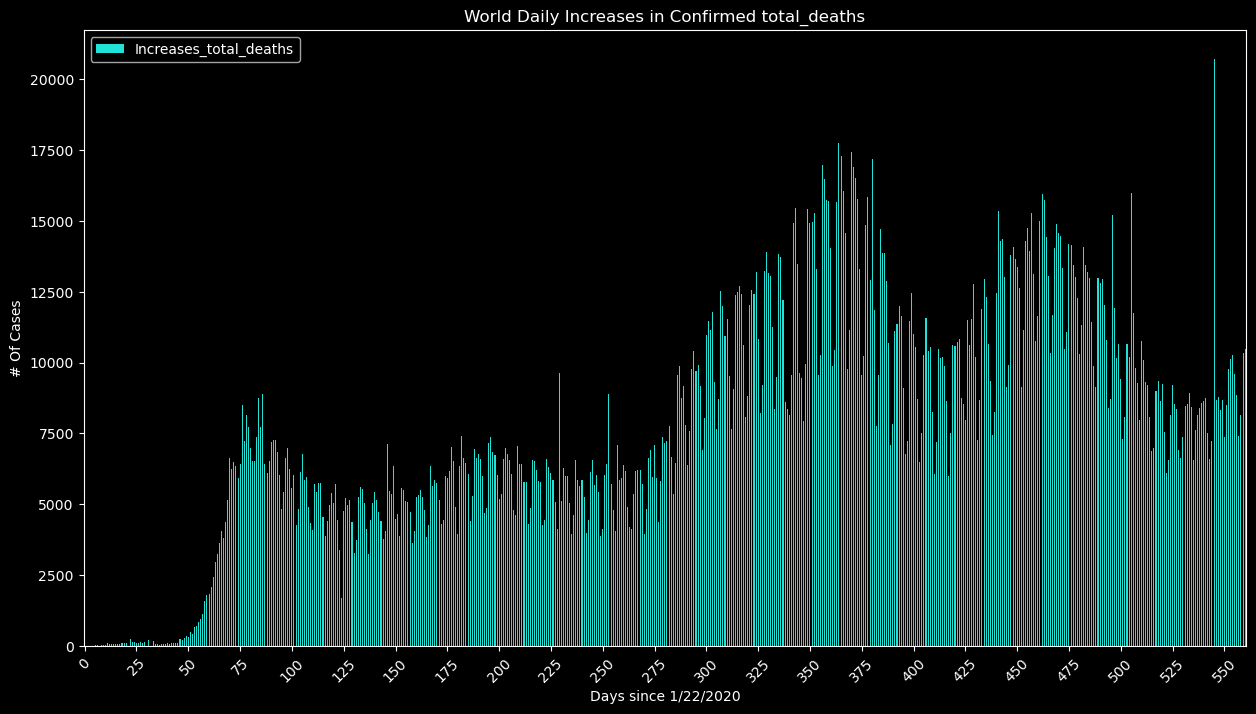

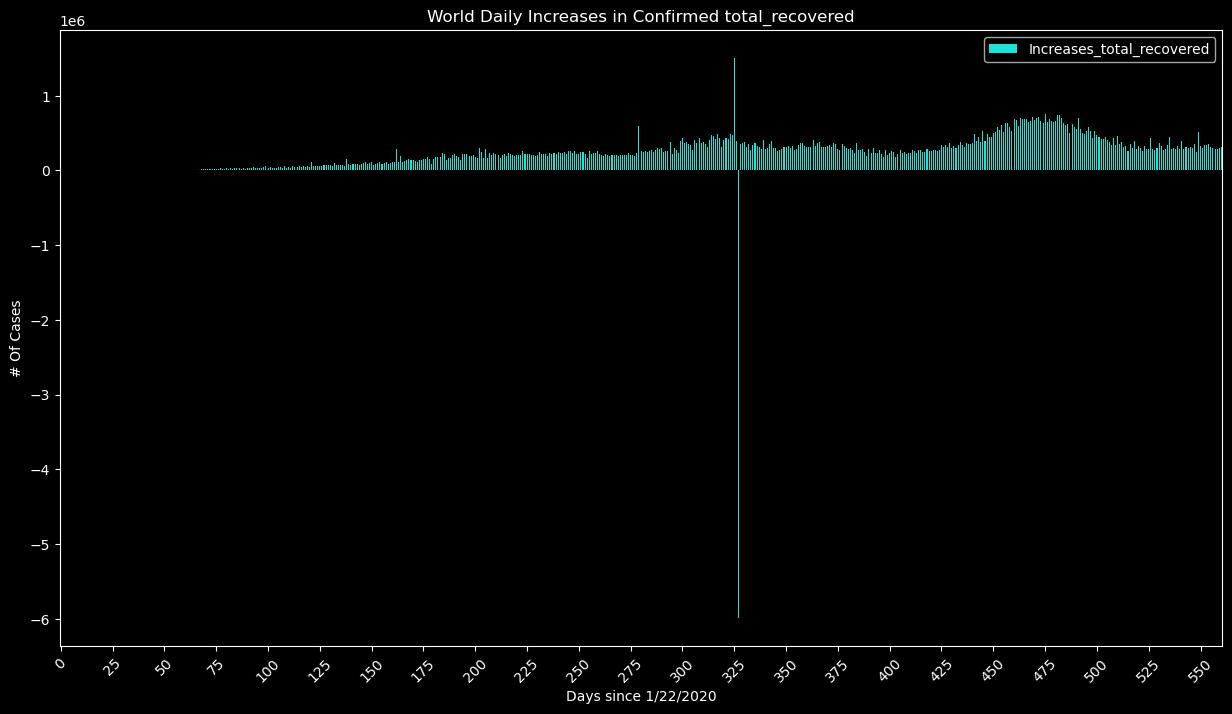

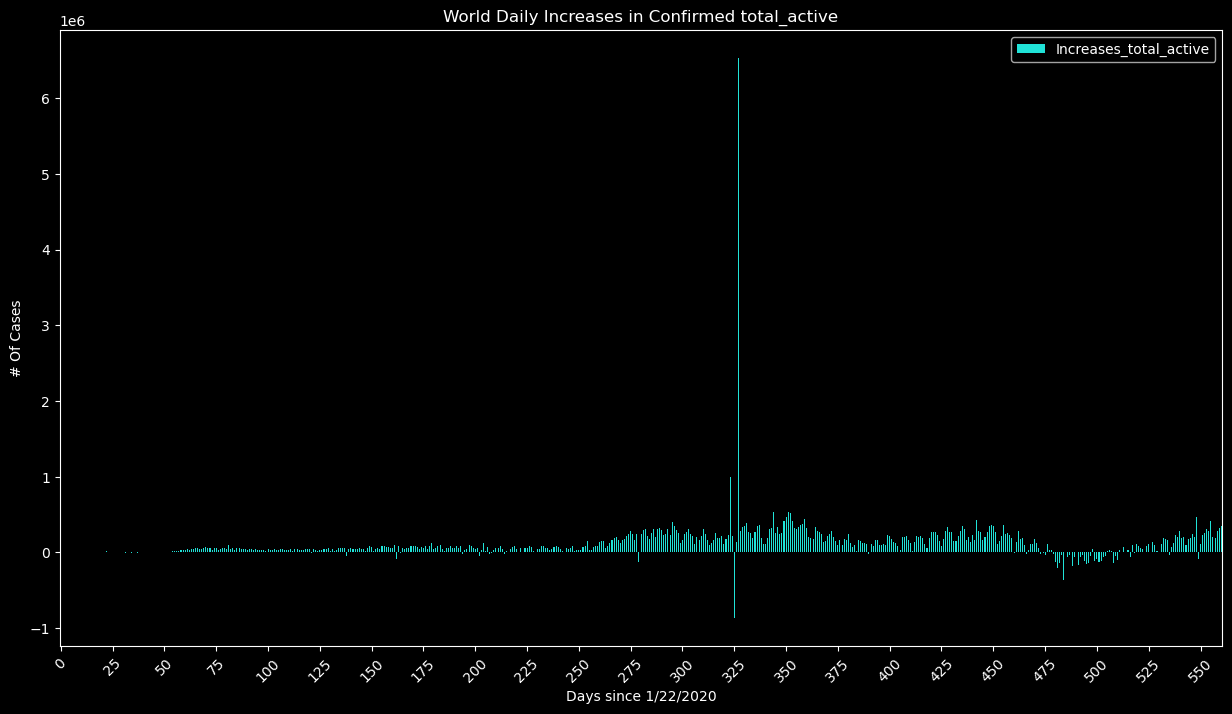

In [48]:
# Vẽ đồ thị
for col in df_total_by_day.columns:    
    df_total_by_day[col].plot(kind = 'bar', xticks = range(0, len(df_total_by_day), 25), figsize = (15, 8), rot = 45, color = ('#20E2D7'), label = f'Increases_{col}')
    plt.title(f'World Daily Increases in Confirmed {col}')
    plt.xlabel('Days since 1/22/2020')
    plt.ylabel('# Of Cases')
    plt.legend()
           
    plt.show()
                       

### Bài toán 6: Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [49]:
df_total['mortality_rate'] = (df_total['total_deaths'] / df_total['total_cases']) * 100
df_total['recovery_rate'] = (df_total['total_recovered'] / df_total['total_cases']) * 100
df_total

total_cases  total_deaths  total_recovered  total_active  mortality_rate  \
0            557            17               30           510        3.052065   
1            657            18               32           607        2.739726   
2            944            26               39           879        2.754237   
3           1437            42               42          1353        2.922756   
4           2120            56               56          2008        2.641509   
..           ...           ...              ...           ...             ...   
556    198389684       4246601        129705211      64437872        2.140535   
557    198872752       4254020        129994389      64624343        2.139066   
558    199443855       4262171        130277533      64904151        2.137028   
559    200078130       4272524        130582001      65223605        2.135428   
560    200758588       4283016        130899061      65576511        2.133416   

     recovery_rate  
0         5.385996  
1         4.870624  
2         4.131356  
3         2.922756  
4         2.641509  
..             ...  
556      65.379010  
557      65.365611  
558      65.320405  
559      65.265505  
560      65.202222  

[561 rows x 6 columns]

### Bài toán 7

### 7.1: Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường. Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

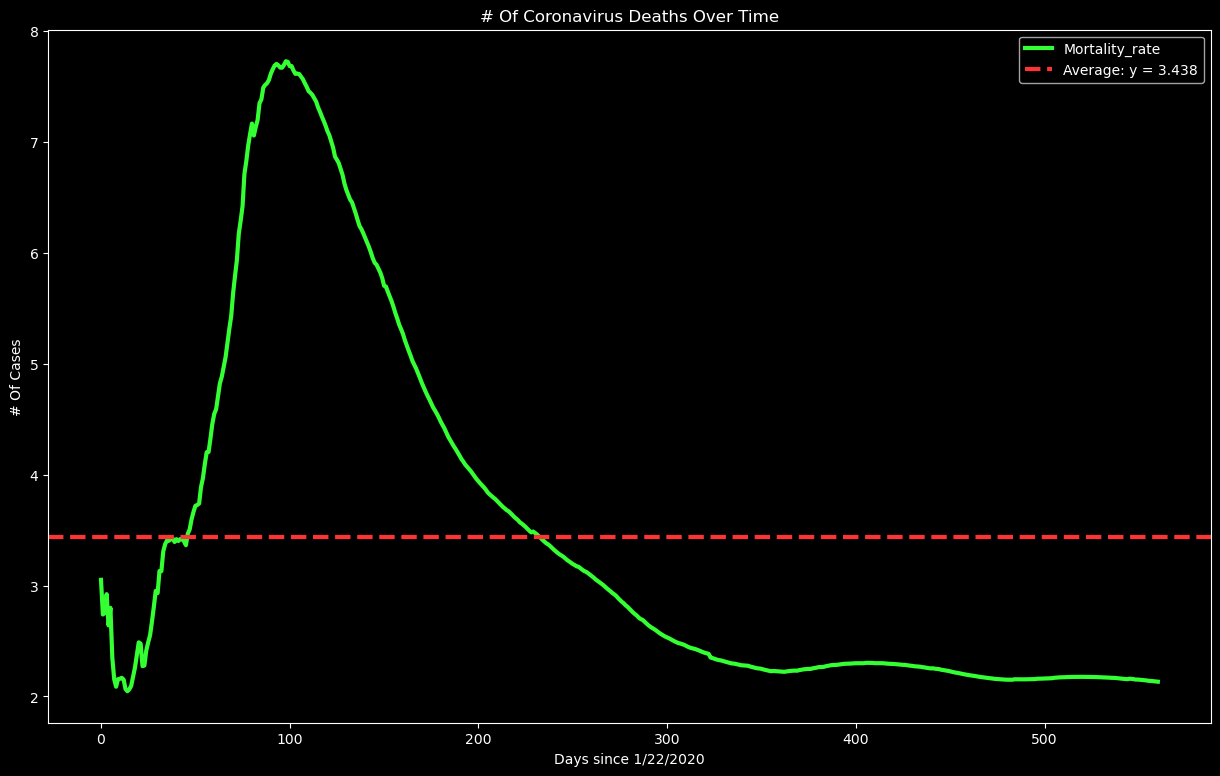

In [50]:
y = round(sum(df_total['mortality_rate']) / len(df_total['mortality_rate']), 3)
df_total['mortality_rate'].plot(kind = 'line', figsize = (15, 9), linewidth = 3, color = ('#33ff33'), label='Mortality_rate')
plt.axhline(y, color = '#ff3333', linestyle = '--', linewidth = 3, label = (f'Average: y = {y}'))

plt.title('# Of Coronavirus Deaths Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# Of Cases')
plt.legend()

plt.show()

### 7.2 Trực quan hóa tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường. Sử dụng đường gạch ngang để trực quan hóa tỷ lệ hồi phục trung bình mọi lúc.

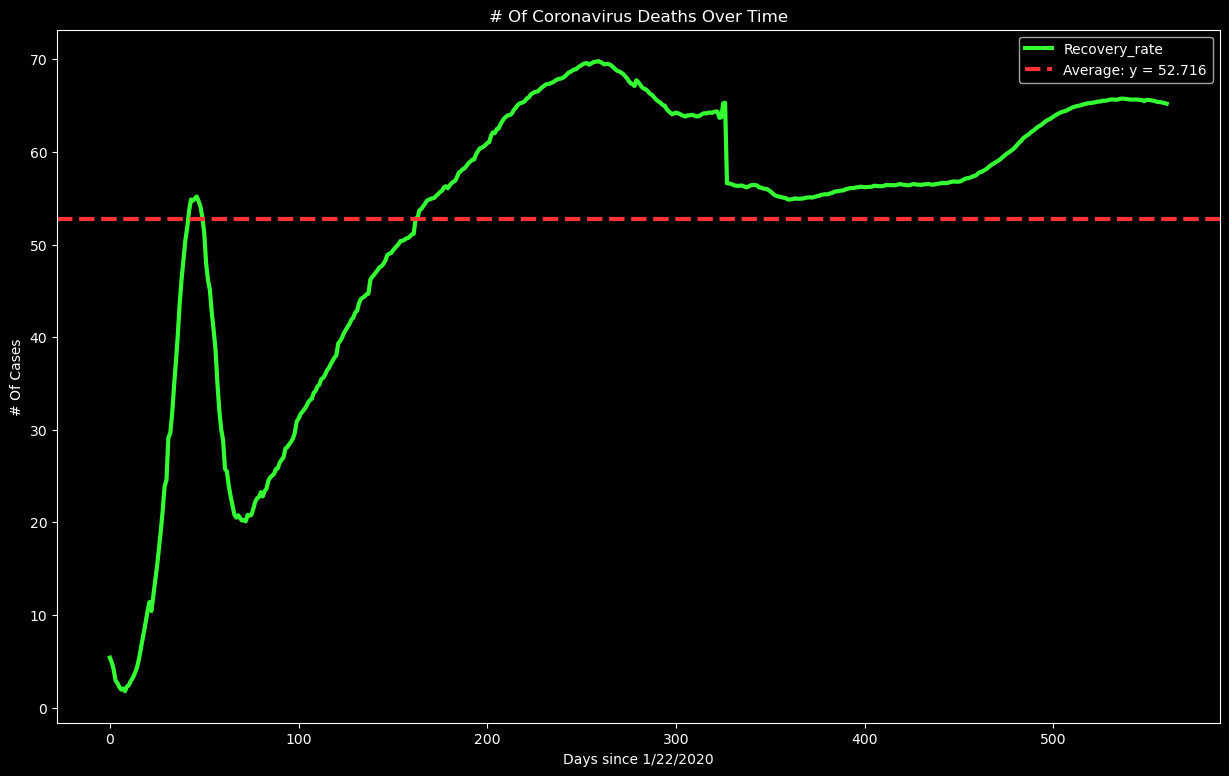

In [51]:
y = round(sum(df_total['recovery_rate']) / len(df_total['recovery_rate']), 3)
df_total['recovery_rate'].plot(kind = 'line', figsize = (15, 9), linewidth = 3, color = ('#33ff33'), label='Recovery_rate')
plt.axhline(y, color = '#ff3333', linestyle = '--', linewidth = 3, label = (f'Average: y = {y}'))

plt.title('# Of Coronavirus Deaths Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# Of Cases')
plt.legend()

plt.show()

# Tiền xử lý dữ liệu

In [52]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


### Bài toán 8: Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df

In [53]:
# Nếu chạy đến đây xuất hiện cảnh báo: "Country's common_name not found. Country name provided instead." Chú ý đây chỉ là cảnh báo không phải lỗi, có thể do 1 mã quốc gia nào đó mà pycountry không tìm thấy, có thể bỏ qua cảnh báo này\
# Bởi vì đối với các quốc gia pycountry không tìm thấy thì sẽ được gán giá trị na và sau đó giá trị na khi ánh xạ vào dic continents và sẽ được gán vào nhóm 'Others'

confirmed_df.insert(2, 'continent', confirmed_df['Country/Region'].apply(country_to_continent_code).map(continents))
deaths_df.insert(2, 'continent', deaths_df['Country/Region'].apply(country_to_continent_code).map(continents))
recoveries_df.insert(2, 'continent', recoveries_df['Country/Region'].apply(country_to_continent_code).map(continents))

F:\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning:

Country's official_name not found. Country name provided instead.

F:\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning:

Country's common_name not found. Country name provided instead.



In [90]:
recoveries_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 566 columns]

In [55]:
# Drop cột
#confirmed_df.drop('continent', axis = 1, inplace = True)
#deaths_df.drop('continent', axis = 1, inplace = True)
#recoveries_df.drop('continent', axis = 1, inplace = True)

### Bài toán 9: Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
Các thông tin cột này sẽ là:
- continent: Lục địa của quốc gia.
- Cases: Tổng số ca dương tính.
- Deaths: Tổng số người chết.
- Recoveries: Tổng số ca hồi phục
- Active: Tổng số đang điều trị.
- Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [56]:
grb_continent_first = confirmed_df.groupby('Country/Region')['continent'].first()
grb_confirmed_df = confirmed_df.groupby('Country/Region').sum()
grb_deaths_df = deaths_df.groupby('Country/Region').sum()
grb_recoveries_df = recoveries_df.groupby('Country/Region').sum()
col = confirmed_df.keys()

country_df = pd.DataFrame({
                          'continent' : grb_continent_first,
                          'Cases' : grb_confirmed_df[col[-1]],
                          'Deaths' : grb_deaths_df[col[-1]],
                          'Recoveries' : grb_recoveries_df[col[-1]],
                          'Active' : grb_confirmed_df[col[-1]] - grb_deaths_df[col[-1]] - grb_recoveries_df[col[-1]],
                          'Mortality Rate': round((grb_deaths_df[col[-1]] / grb_confirmed_df[col[-1]]) * 100, 2)
                          }, index = grb_confirmed_df.index)
country_df.head()

continent   Cases  Deaths  Recoveries  Active  Mortality Rate
Country/Region                                                              
Afghanistan         Asia  148933    6836       82586   59511            4.59
Albania           Europe  133310    2457      130314     539            1.84
Algeria           Africa  176724    4404      118409   53911            2.49
Andorra           Europe   14797     128       14380     289            0.87
Angola            Africa   43158    1026       39582    2550            2.38

### Bài toán 10: Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
Các thông tin cột này sẽ là:

 - Confirmed: Tổng số ca mắc Covid.
 - Deaths: Tổng số người chết.
 - Recoveries: Tổng số lần khôi phục.
 - Active: Tổng số đang điều trị.
 - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [57]:
gr_confirmed_df = confirmed_df.groupby('continent').sum()
gr_deaths_df = deaths_df.groupby('continent').sum()
gr_recoveries_df = recoveries_df.groupby('continent').sum()
colm = gr_confirmed_df.keys()

continental_df = pd.DataFrame()
continental_df.index = gr_confirmed_df.index
continental_df['Confirmed'] = gr_confirmed_df[colm[-1]]
continental_df['Deaths'] = gr_deaths_df[colm[-1]]
continental_df['Recoveries'] = gr_recoveries_df[colm[-1]]
continental_df['Active'] = continental_df['Confirmed'] - continental_df['Deaths'] - continental_df['Recoveries']
continental_df['Mortality Rate'] = round((continental_df['Deaths'] / continental_df['Confirmed']) * 100, 2)

continental_df.head()

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18

In [58]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    
    for i,stat in enumerate(stats):               
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()


### Bài toán 11: Bài toán 11: Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.

In [91]:
confirmed_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 566 columns]

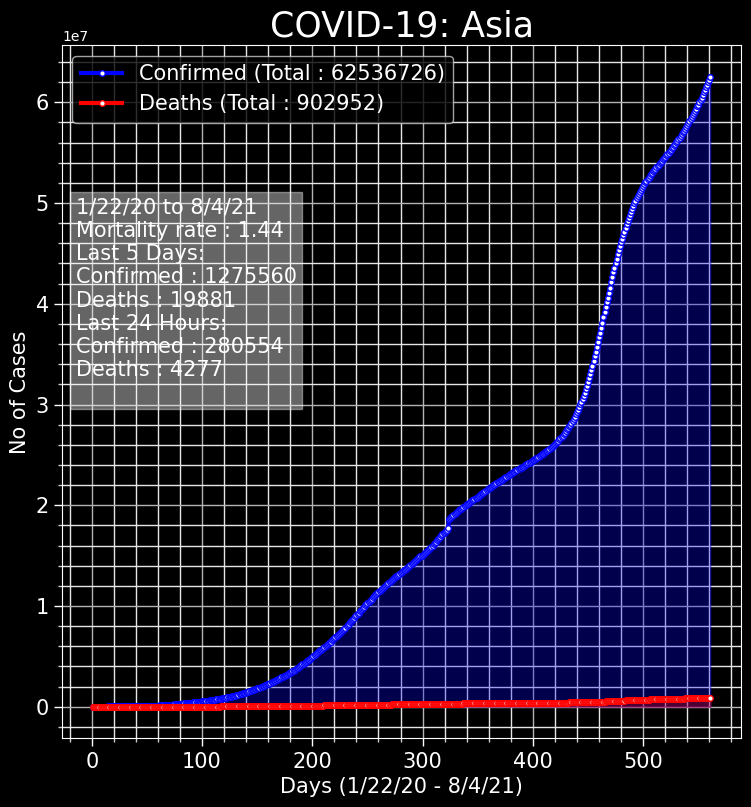

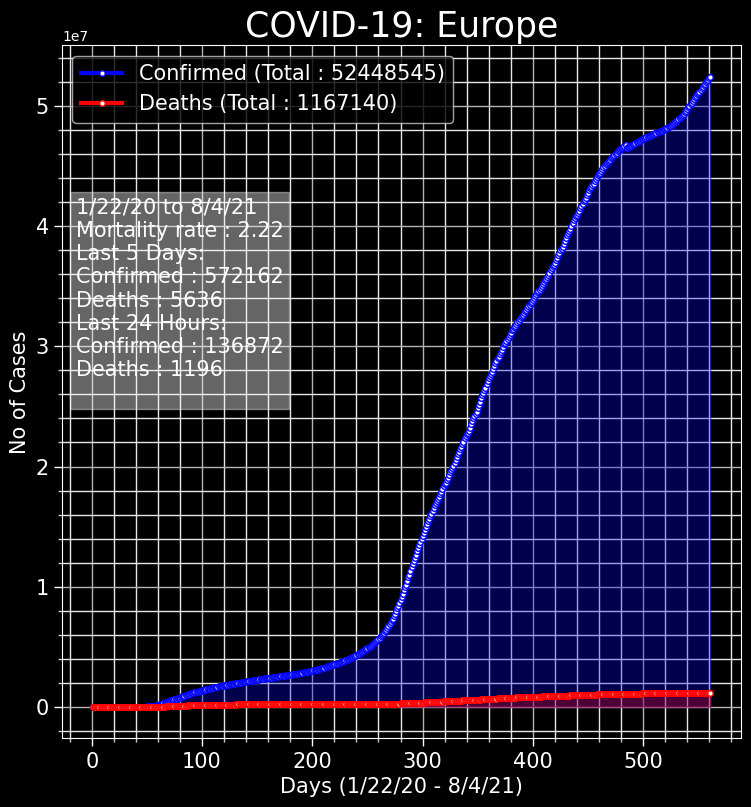

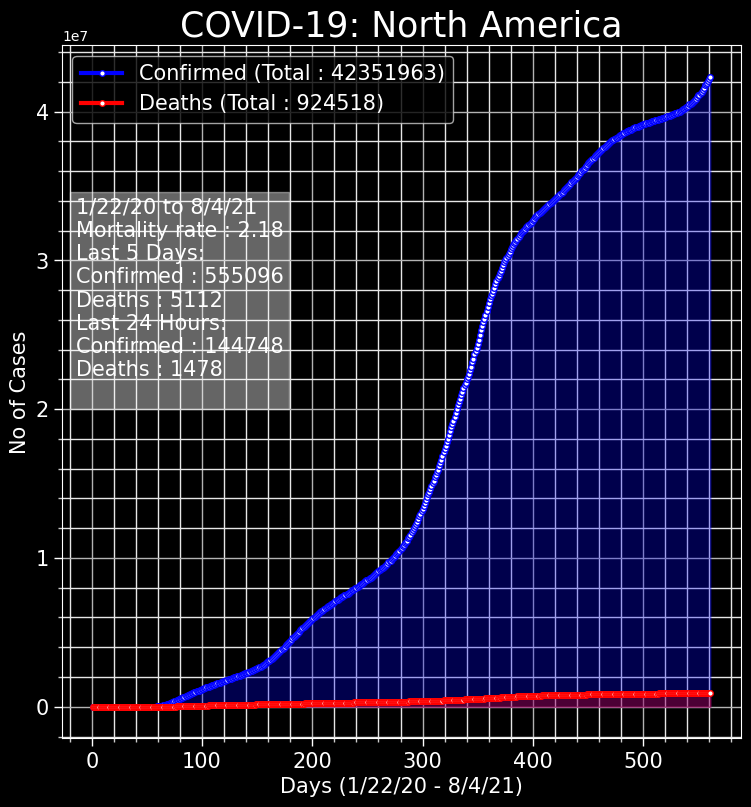

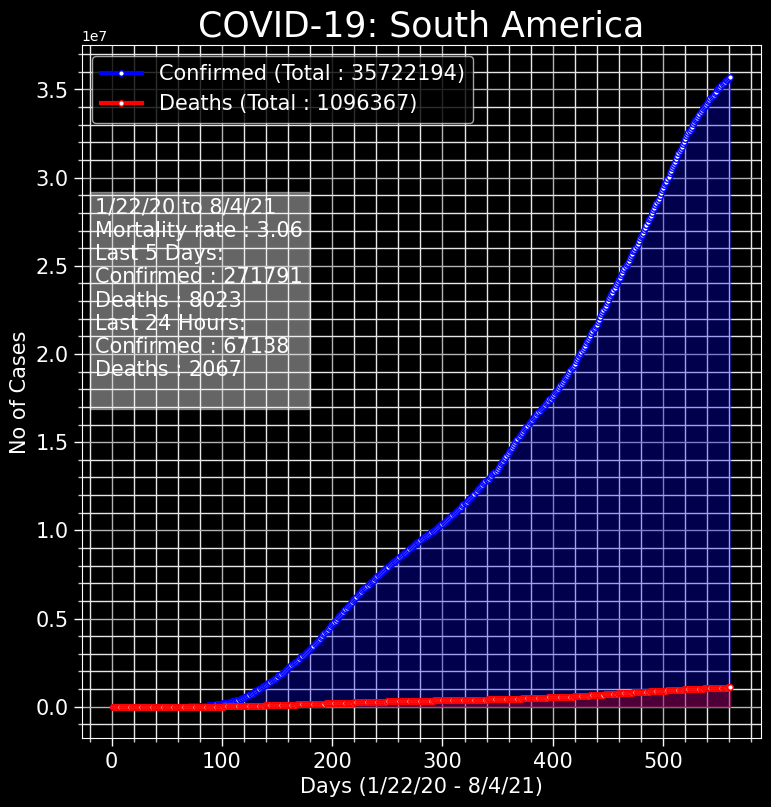

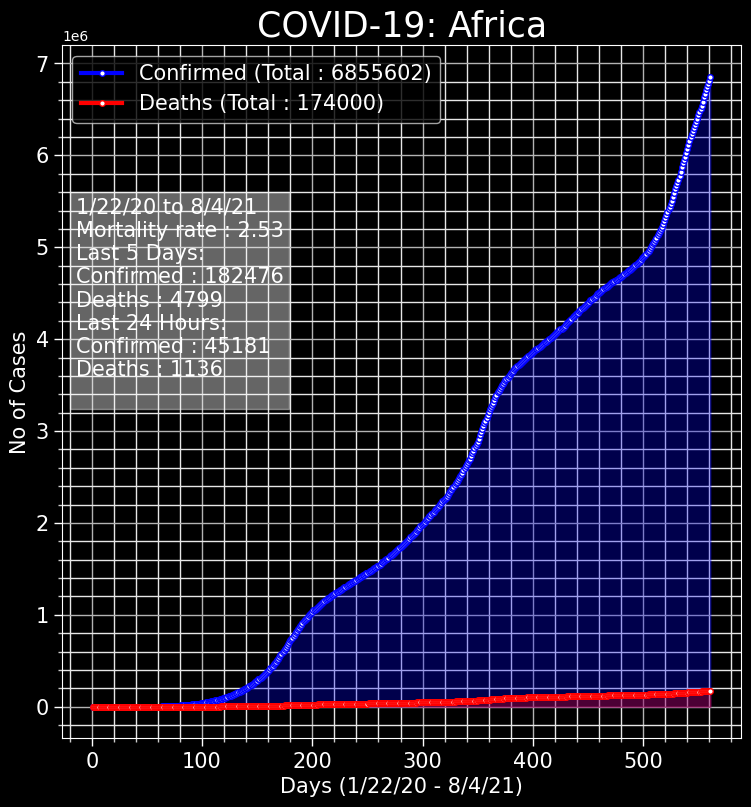

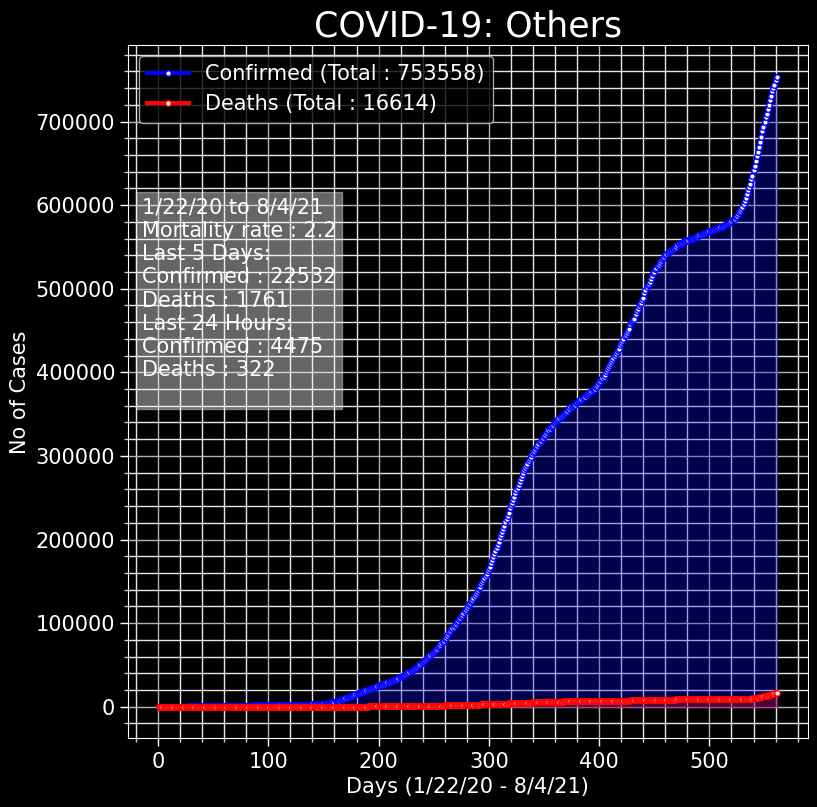

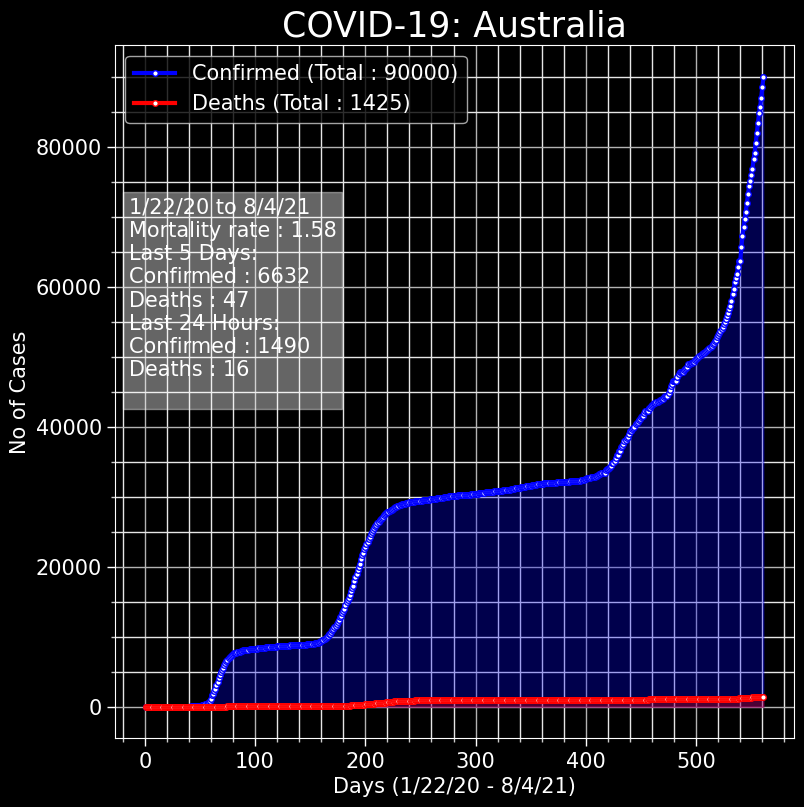

In [92]:
# Sắp xếp dữ liệu theo thứ tự giảm dần theo số ca được xác nhận
index_sorted_continental_df = continental_df.sort_values(by='Confirmed', ascending=False).index

# Áp dụng hàm visualize_covid_cases cho từng lục địa

for i in index_sorted_continental_df:
    visualize_covid_cases(confirmed_df,
                          deaths_df, 
                          continent = i, 
                          country=None, 
                          state=None, 
                          period=None, 
                          figure=None, 
                          scale="linear"
                        )

### Sửa đổi "plot_params" và hàm "visualize_covid_cases" để:
- Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
 - Thêm "Recoveries line" vào biểu đồ chính.
 - Thêm số "Total Recoveries" vào bảng nhỏ.
 - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [61]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases1(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recovered"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    
    for i,stat in enumerate(stats):               
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
    
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()


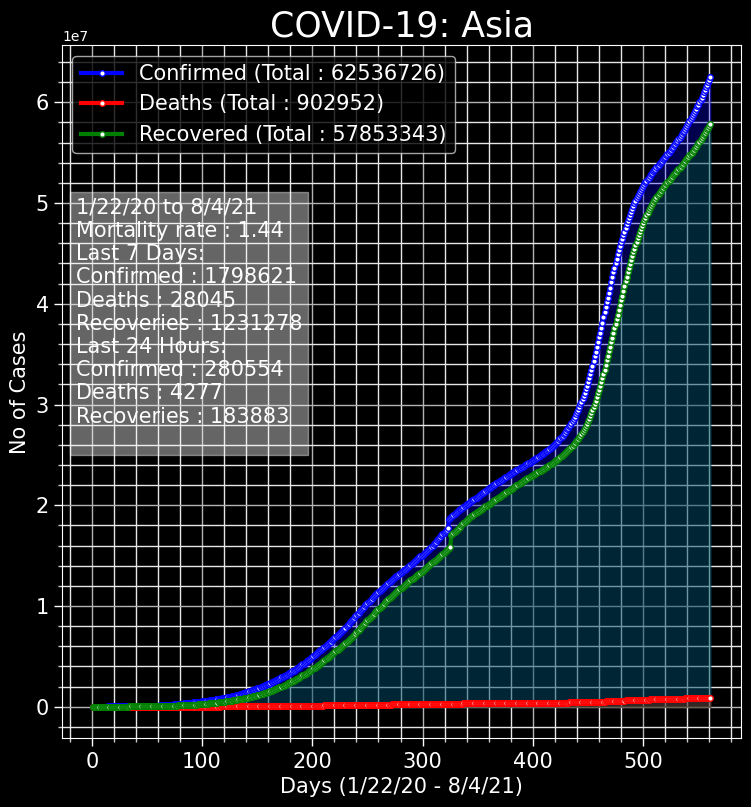

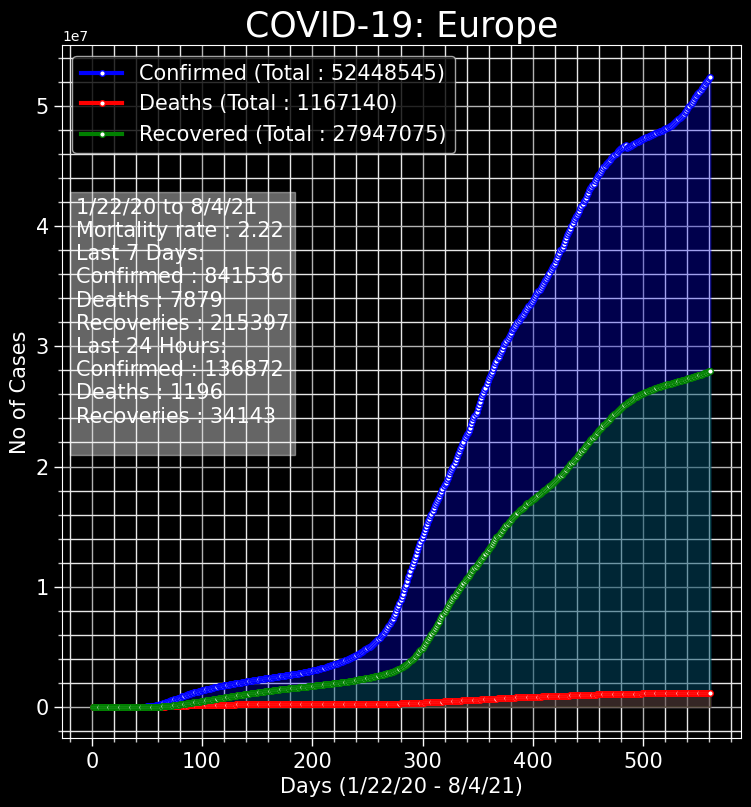

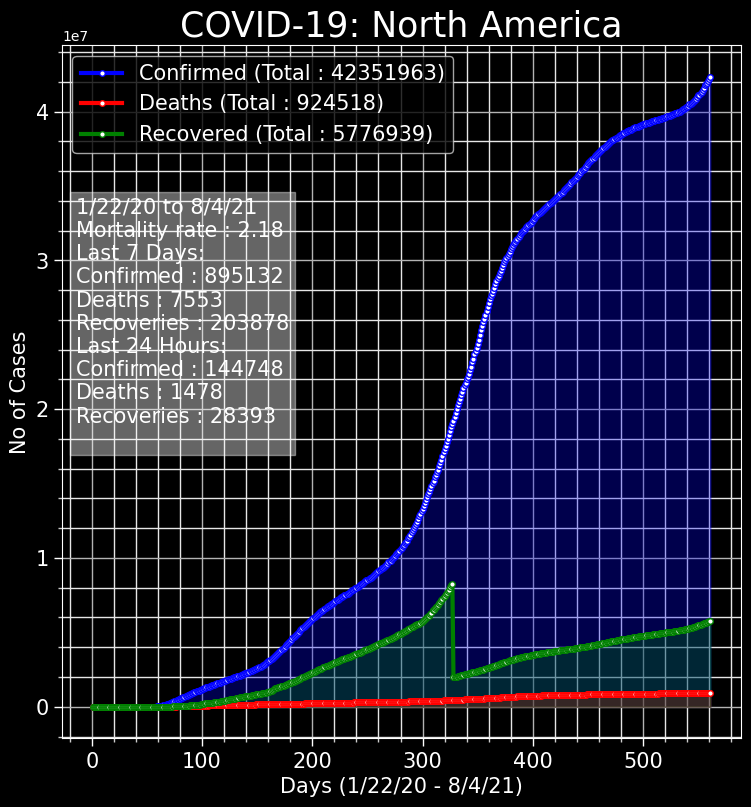

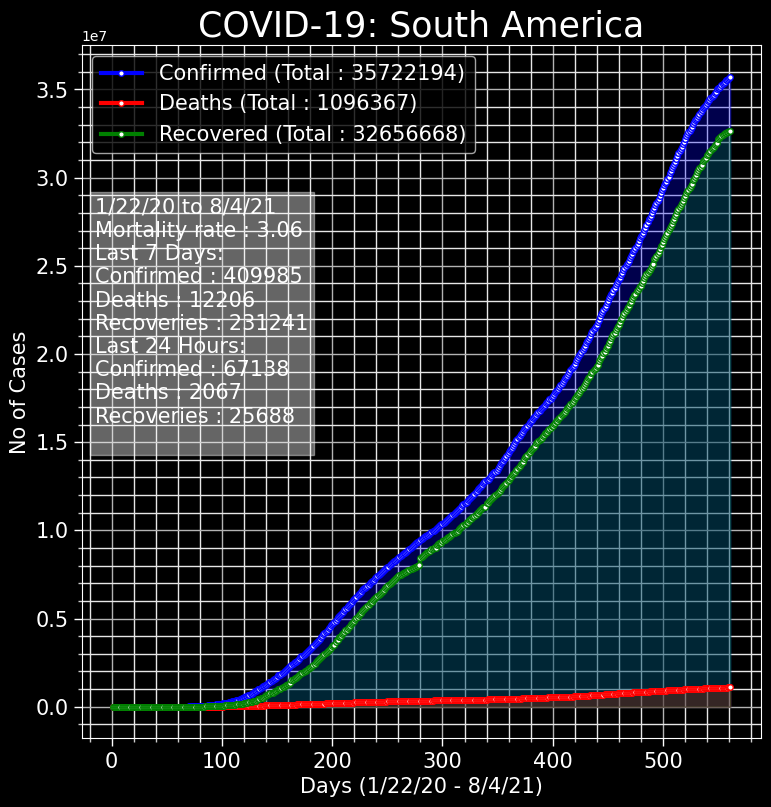

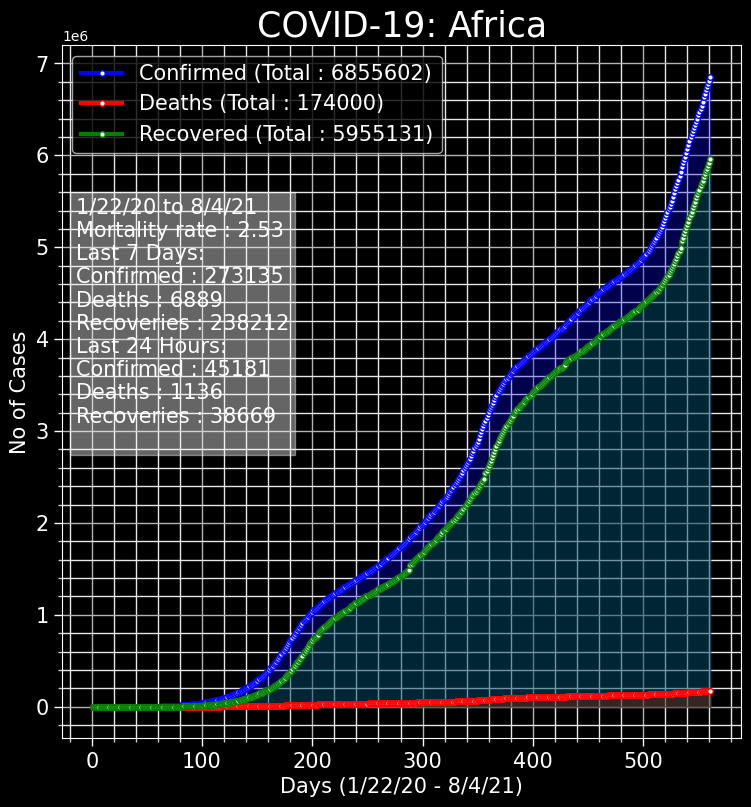

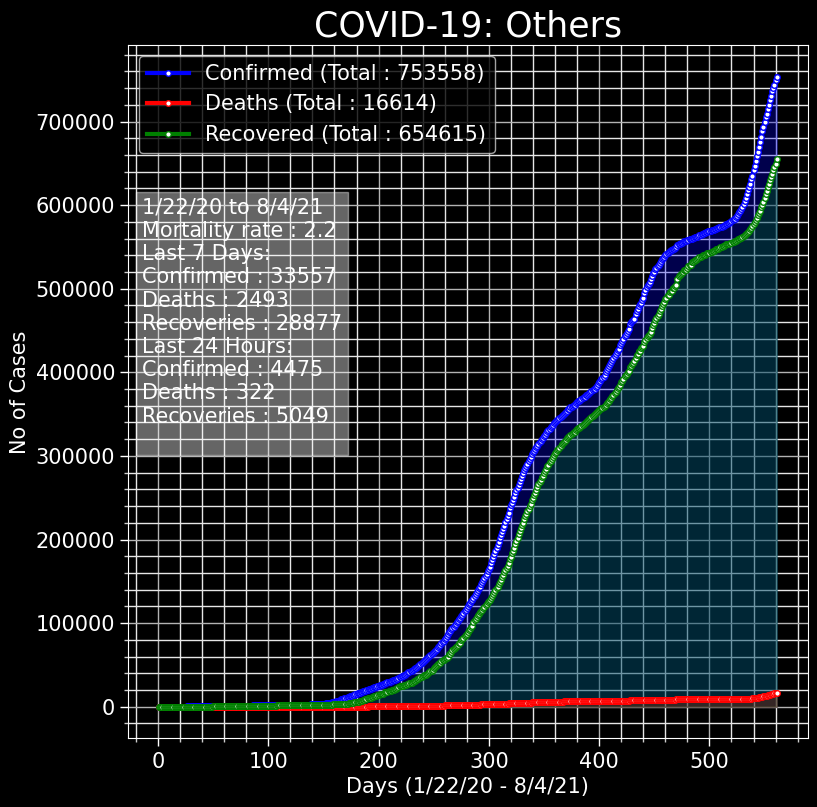

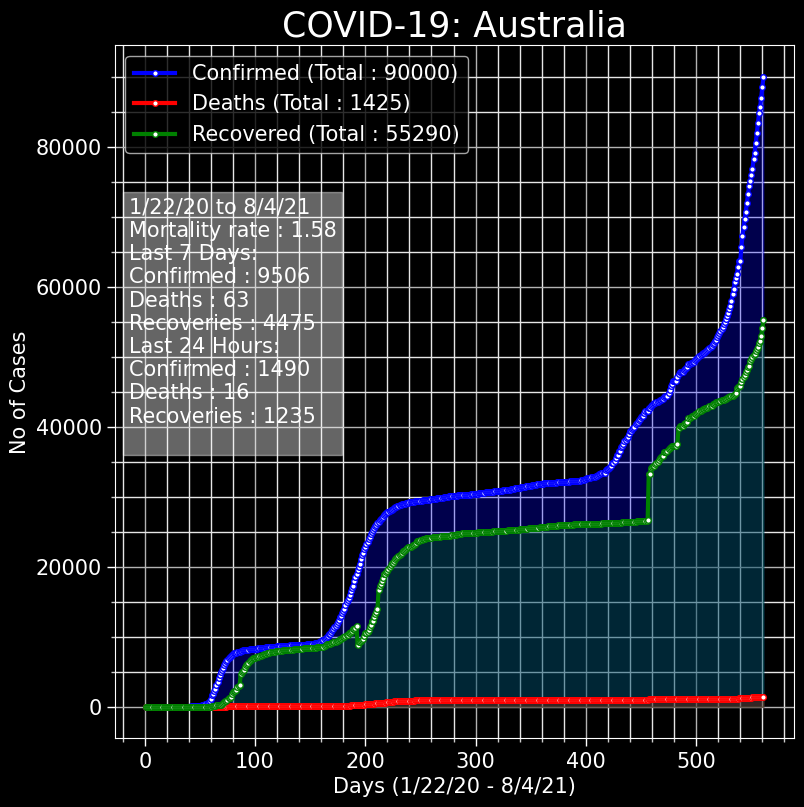

In [62]:
# Sắp xếp dữ liệu theo thứ tự giảm dần theo số ca được xác nhận
index_sorted_continental_df1 = continental_df.sort_values(by='Confirmed', ascending=False).index

# Áp dụng hàm visualize_covid_cases cho từng lục địa

for i in index_sorted_continental_df1:
    visualize_covid_cases1(confirmed_df,
                          deaths_df,
                          recoveries_df,
                          continent = i, 
                          country=None, 
                          state=None, 
                          period=None, 
                          figure=None, 
                          scale="linear"
                        )

### Bài toán 12: Trực quan hóa ma trận tương quan của continents_df.

In [63]:
continental_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

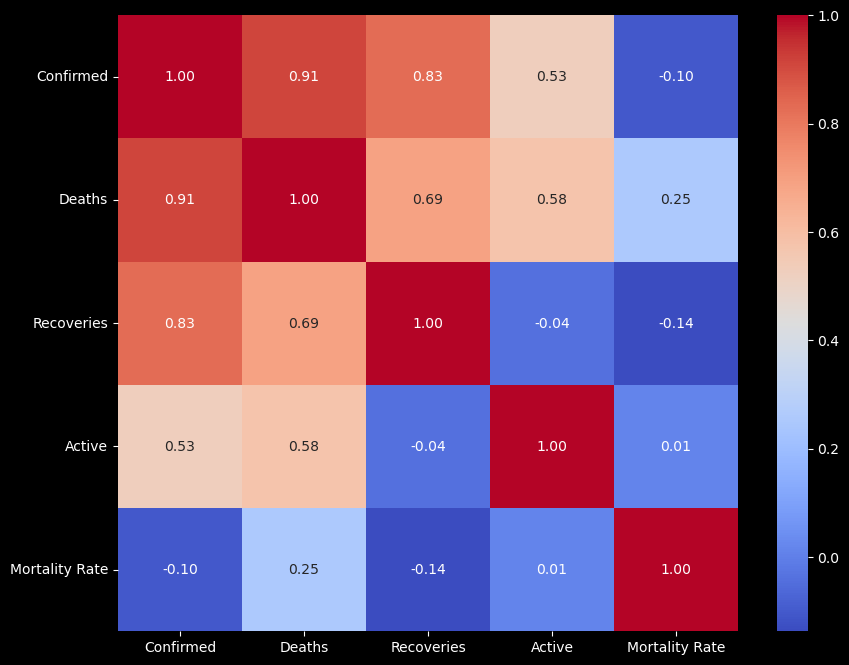

In [64]:
# Tính toán ma trận tương quan
correlation_matrix = continental_df.corr()

# Tạo heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".02f", cmap="coolwarm")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

### Bài toán 13: 
Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

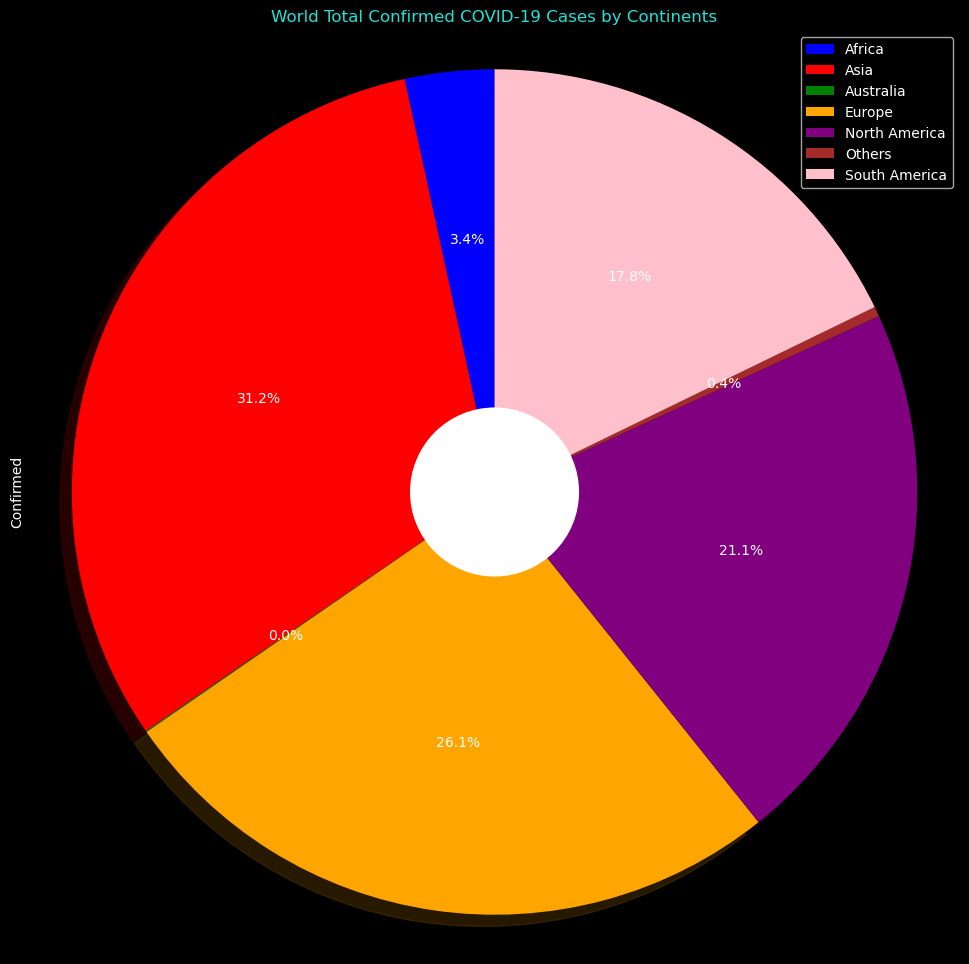

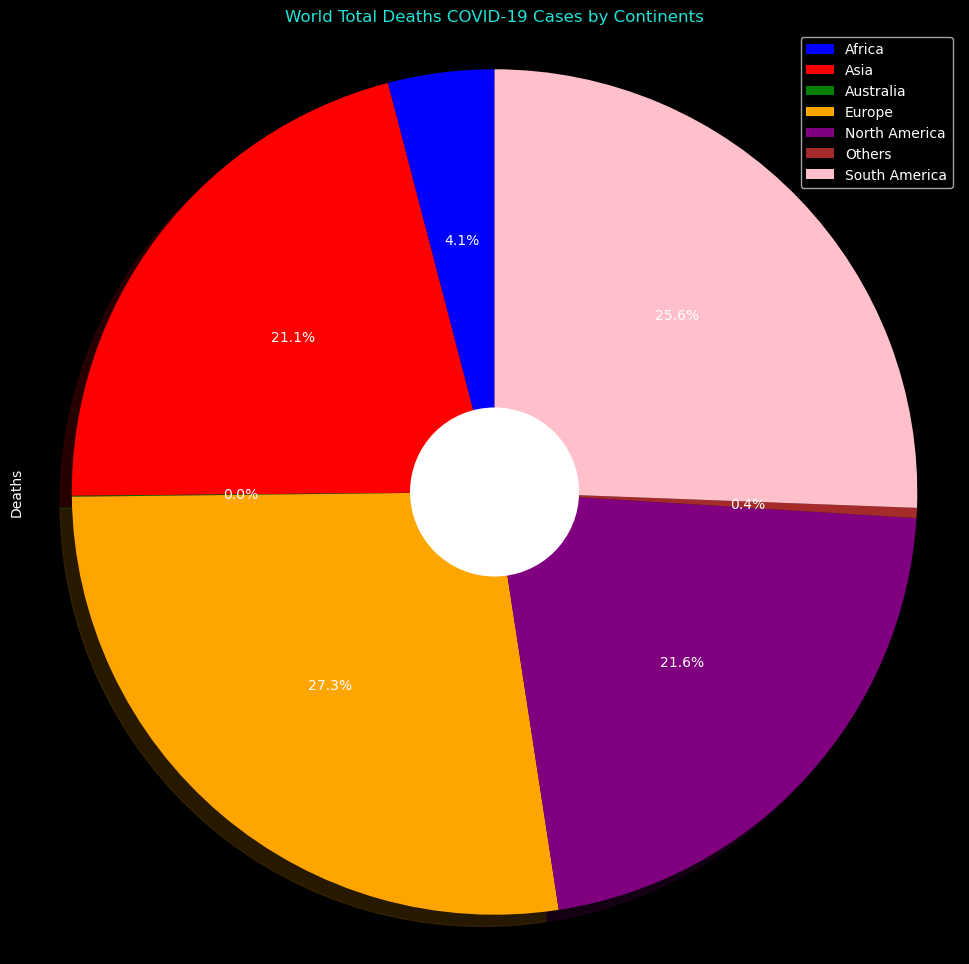

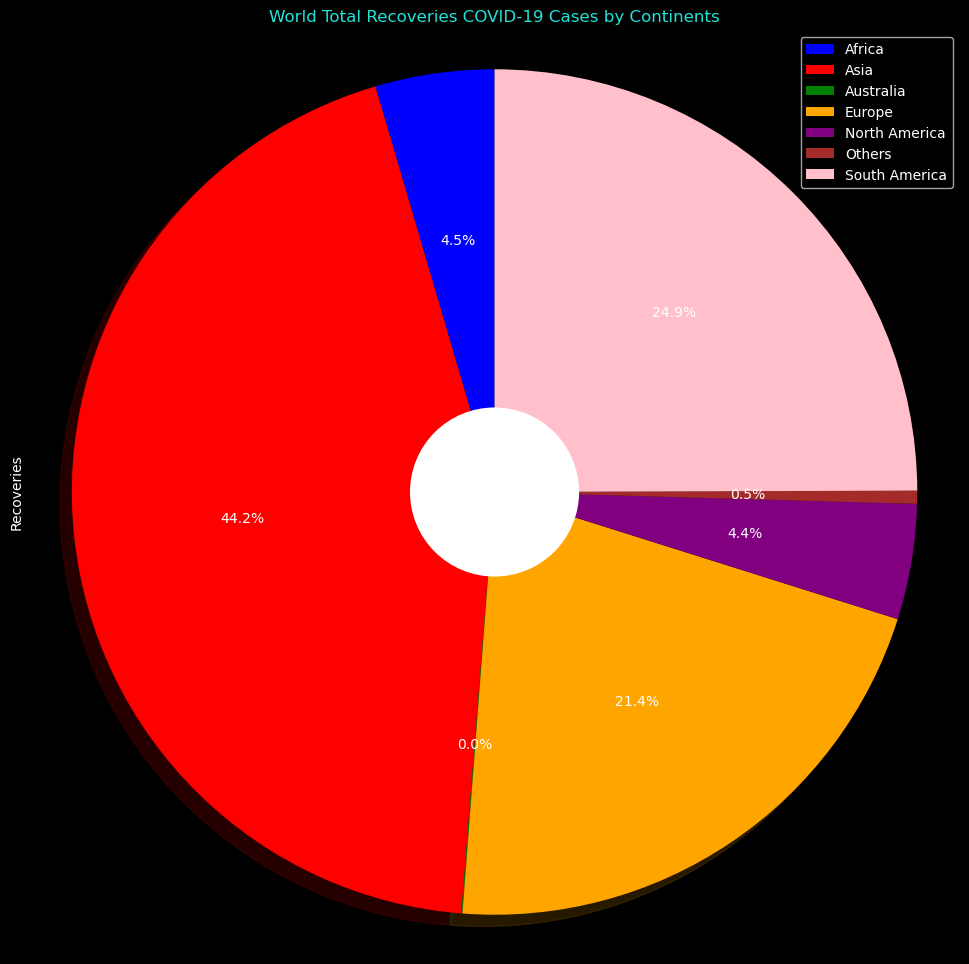

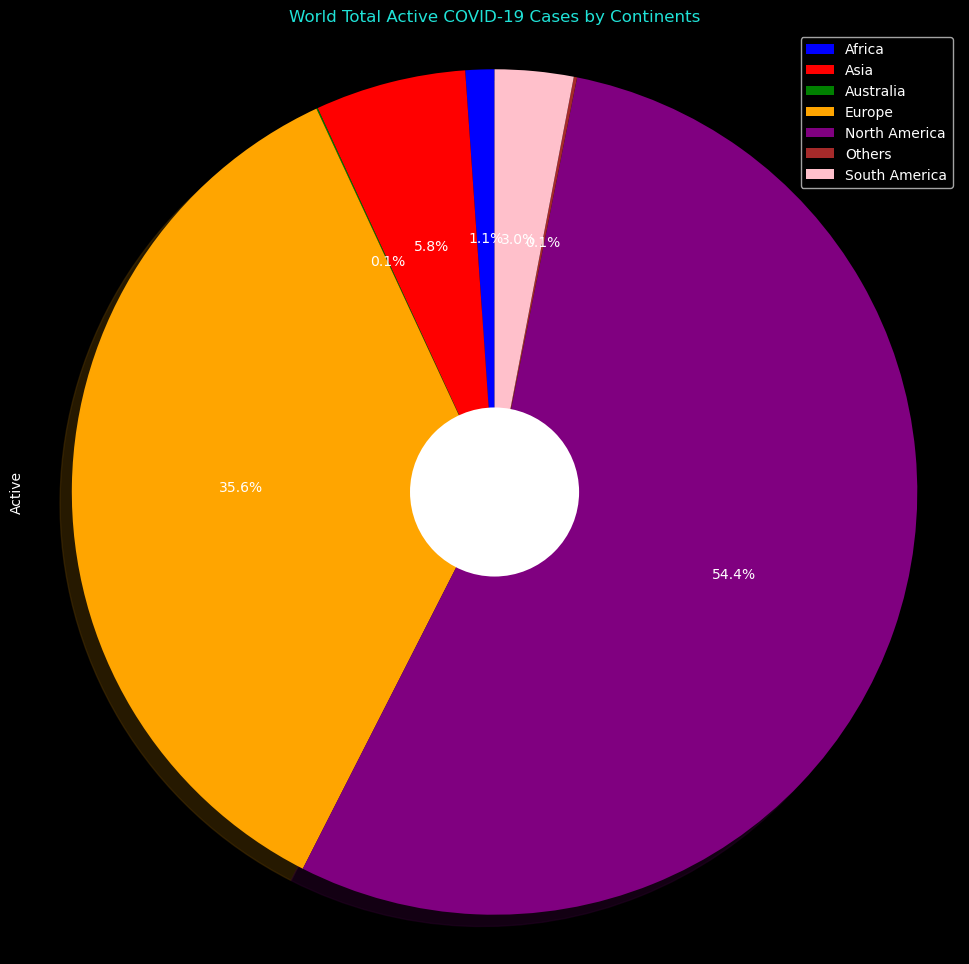

In [65]:
fields = continental_df.iloc[:, :-1].keys()
color_list = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']  # Màu sắc cho mỗi lục địa


# Tạo biểu đồ hình tròn cho mỗi trường
for field in fields:
    plt.figure(figsize=(12, 12))
    continental_df[field].plot(kind = 'pie',
                               labels=None, 
                               colors=color_list, 
                               autopct='%1.1f%%', 
                               startangle=90,
                               shadow = True                               
                              )
    
    plt.title(f'World Total {field} COVID-19 Cases by Continents', color='#20E2D7')
    plt.legend(continental_df.index, loc = 'upper right')
    centre_circle = plt.Circle((0,0),0.20,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    
    
    plt.show()

### Bài toán 14: Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.

In [66]:
confirmed_df.head(3)

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  

[3 rows x 566 columns]

In [67]:
# Lấy giá trị trung bình theo quốc gia tại 2 cột Lat, Long để dại diện cho 1 quốc gia.
country_df.insert(1, 'Lat', confirmed_df.groupby('Country/Region')['Lat'].mean())
country_df.insert(2, 'Long', confirmed_df.groupby('Country/Region')['Long'].mean())
country_df.head(3)

continent       Lat       Long   Cases  Deaths  Recoveries  \
Country/Region                                                              
Afghanistan         Asia  33.93911  67.709953  148933    6836       82586   
Albania           Europe  41.15330  20.168300  133310    2457      130314   
Algeria           Africa  28.03390   1.659600  176724    4404      118409   

                Active  Mortality Rate  
Country/Region                          
Afghanistan      59511            4.59  
Albania            539            1.84  
Algeria          53911            2.49

In [68]:
# Check lại các quốc gia lưu thông tin các ca bệnh theo thành phố để xác nhận lại Lat, Long(ví dụ Canada, China)
country_df.loc['China', ['Lat', 'Long']]

Lat      32.887645
Long    111.785991
Name: China, dtype: object

In [69]:
m = folium.Map(location=[20, 0], zoom_start=2.5, tiles = 'CartoDB dark matter')

# Thêm CircleMarker vào bản đồ
for idx, row in country_df.iterrows():
    # Tính toán bán kính, tỷ lệ thuận với số ca xác nhận
    radius = row['Cases'] / 350000
    folium.features.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=radius,
        color='#20E2D7',
        fill=True,
        fill_color='#20E2D7',
        fill_opacity=0.6,
        popup=(f"{idx}<br>"
               f"Confirm:{row['Cases']}<br>"
               f"Deaths:{row['Deaths']}<br>"
               f"Recovered:{row['Recoveries']}<br>"
               f"Mortality Rate:{row['Mortality Rate']}%")            
    ).add_to(m)

# Hiển thị bản đồ
m

### Bài toán 15: Xây dựng một bản đồ px (plotly.express) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

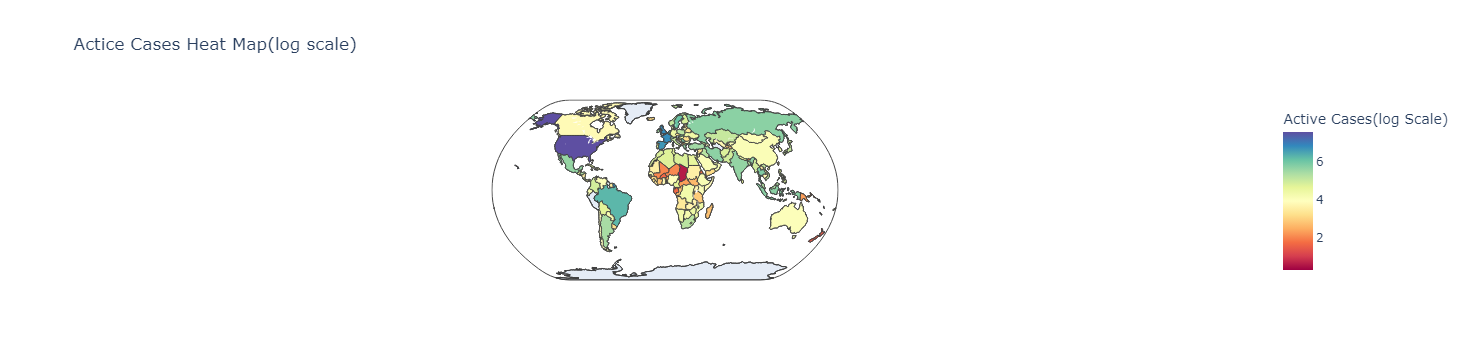

In [70]:
countries_df = country_df.copy().reset_index()
countries_df = countries_df[countries_df['Active'] > 0]
countries_df['log_Active'] = np.log10(countries_df['Active'])

# Tạo biểu đồ choropleth
fig = px.choropleth(countries_df, 
                    locations='Country/Region',  
                    locationmode="country names",  
                    color='log_Active',  
                    hover_name='Country/Region', 
                    hover_data={'Country/Region' : True, 'Active': True, 'log_Active': True},
                    projection="natural earth",  
                    title="Actice Cases Heat Map(log scale)",
                    color_continuous_scale="Spectral",  
                    labels={'log_Active':'Active Cases(log Scale)'}, 
                    
                   )

fig.update_geos(showcountries=True, countrycolor="Black")  

fig.show()

### Bài toán 16: Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [71]:
top10_country_df = country_df.sort_values(by = 'Cases', ascending = False).head(10)
top10_country_df

continent        Lat        Long     Cases  Deaths  \
Country/Region                                                           
USA             North America  40.000000 -100.000000  35460776  611222   
India                    Asia  20.593684   78.962880  31812114  426290   
Brazil          South America -14.235000  -51.925300  20034407  559944   
Russia                 Europe  61.524010  105.318756   6274006  159032   
France                 Europe   6.425300   -9.839634   6272466  112245   
United Kingdom         Europe  22.424560  -42.022004   5980830  157209   
Turkey                   Asia  38.963700   35.243300   5822487   51767   
Argentina       South America -38.416100  -63.616700   4975616  106747   
Colombia        South America   4.570900  -74.297300   4815063  121695   
Spain                  Europe  40.463667   -3.749220   4545184   81844   

                Recoveries    Active  Mortality Rate  
Country/Region                                        
USA                      0  34849554            1.72  
India             30974748    411076            1.34  
Brazil            17771228   1703235            2.79  
Russia             5609682    505292            2.53  
France              415111   5745110            1.79  
United Kingdom       24693   5798928            2.63  
Turkey             5478185    292535            0.89  
Argentina          4615834    253035            2.15  
Colombia           4615354     78014            2.53  
Spain               150376   4312964            1.80

### Bài toán 17: Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.

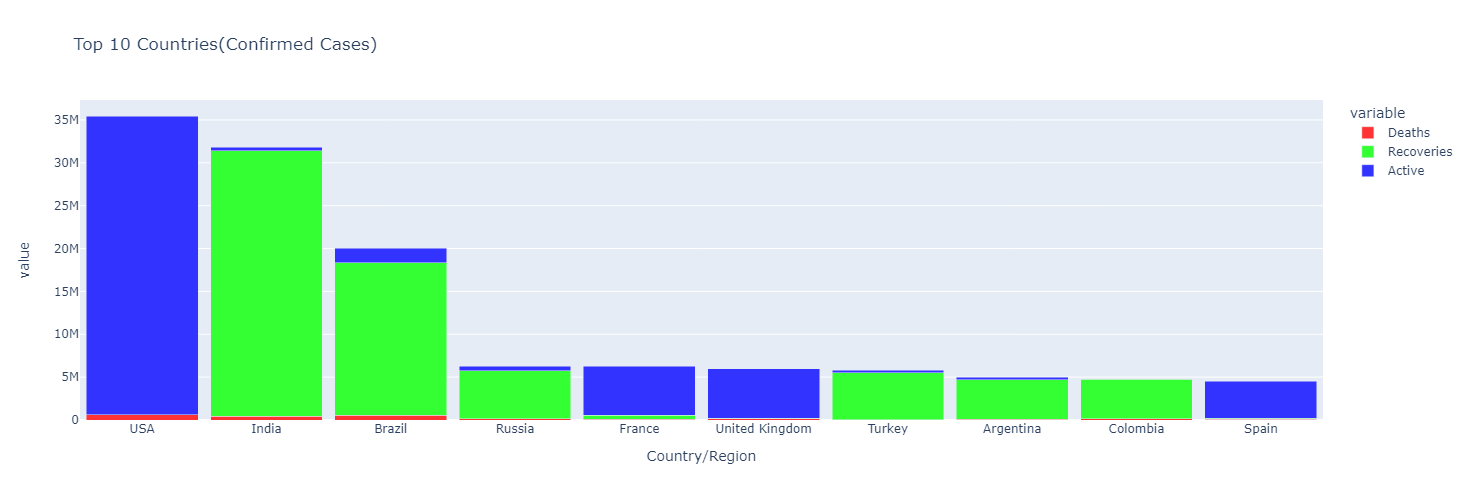

In [72]:
# Chọn các cột cần trực quan hóa
columns = ['Deaths', 'Recoveries', 'Active']
colors = ['#FF3333', '#33FF33', '#3333FF']

# Tạo biểu đồ cột với Plotly
fig = px.bar(top10_country_df,
             x=top10_country_df.index,
             y=columns,             
             color_discrete_sequence=colors,
             title='Top 10 Countries(Confirmed Cases)'
            )

# Cập nhật biểu đồ
fig.update_layout(height=500, barmode='stack', bargap=0.1)

# Hiển thị biểu đồ
fig.show()

### Bài toán 18: Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?

**Dựa trên dữ liệu trực quan trên toàn cầu tính từ ngày `1/22/2020` đến `4/8/2020` dựa vào biểu đồ ở `Bài toán 5` chúng ta nhận thấy dịch COVID 2019 trên thế giới bắt đầu lây lan mạnh từ đầu năm 2020 cho đến cuối năm 2020 và đầu năm 2021 thì đạt đến đỉnh điểm, sau đó có dấu hiệu hạ nhiệt vào khoảng giữa năm 2021.**

### Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?

19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó). Đặt câu trả lời của bạn ở đây:

In [73]:
continents_df = continental_df.copy()
col_cases = confirmed_df.iloc[:, 5:].columns

# Các ca dương tính theo ngày tính theo châu lục
confirmed_continent_by_day = confirmed_df.groupby('continent')[col_cases].sum().diff(axis = 1).fillna(0)

# Số lượng ca mới xác nhận trong 10 ngày qua
continents_df['Cfd_10lastday'] = confirmed_continent_by_day[col_cases[-10:]].sum(axis = 1)

# Số ca dương tính trước đó
continents_df['Cfd_before_10lastday'] = confirmed_continent_by_day[col_cases[:-10]].sum(axis = 1)

# Tỷ lệ lây lan Covid 19
continents_df['Confirmed Rate'] = round((continents_df['Cfd_10lastday'] / continents_df['Cfd_before_10lastday']) * 100, 2)

# Tỷ lệ khỏi bệnh
continents_df['Recoveries Rate'] = round((continents_df['Recoveries'] / continents_df['Confirmed']) * 100, 2)

# Tỷ lệ tử vong cao nhất
max_mortality_rate = continents_df.sort_values(by = 'Mortality Rate', ascending = False).index[0]

# Tỷ lệ lây lan cao nhất
max_confirmed_rate = continents_df.sort_values(by = 'Confirmed Rate', ascending = False).index[0]

# Tỷ lệ khỏi bệnh cao nhất
max_recoveries_rate = continents_df.sort_values(by = 'Recoveries Rate', ascending = False).index[0]

print(f"Châu lục có tỷ lệ tử vong cao nhất trong các lục địa: {max_mortality_rate}\nChâu lục có tỷ lệ lây lan cao nhất trong các lục địa: {max_confirmed_rate}\nChâu lục có tỷ lệ khỏi bệnh cao nhất trong các lục đia: {max_recoveries_rate}")

Châu lục có tỷ lệ tử vong cao nhất trong các lục địa: South America
Châu lục có tỷ lệ lây lan cao nhất trong các lục địa: Australia
Châu lục có tỷ lệ khỏi bệnh cao nhất trong các lục đia: Asia


In [74]:
continents_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate  \
continent                                                                 
Africa           6855602   174000     5955131    726471            2.54   
Asia            62536726   902952    57853343   3780431            1.44   
Australia          90000     1425       55290     33285            1.58   
Europe          52448545  1167140    27947075  23334330            2.23   
North America   42351963   924518     5776939  35650506            2.18   
Others            753558    16614      654615     82329            2.20   
South America   35722194  1096367    32656668   1969159            3.07   

               Cfd_10lastday  Cfd_before_10lastday  Confirmed Rate  \
continent                                                            
Africa                387003             6468599.0            5.98   
Asia                 2542820            59993350.0            4.24   
Australia              13244               76756.0           17.25   
Europe               1244322            51204223.0            2.43   
North America        1207259            41144703.0            2.93   
Others                 48741              704817.0            6.92   
South America         615123            35107071.0            1.75   

               Recoveries Rate  
continent                       
Africa                   86.87  
Asia                     92.51  
Australia                61.43  
Europe                   53.28  
North America            13.64  
Others                   86.87  
South America            91.42

### Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?

20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?

In [75]:
# Kết quả bên dưới bao gồm cả các quốc gia và các sự kiện đã diễn ra trong khoảng thời gian trên thế giới
# Tuy nhiên nếu không muốn tính các sự kiện vào kết quả thì chúng ta có thể loại bỏ các phần tử 'Others' trong cột 'continent' bằng câu lệnh:
# df_country = country_df.loc[country_df['continent'] != 'Others'].copy() ==> thay vào dòng code đầu tiên

df_country = country_df.copy()
col_case = confirmed_df.iloc[:, 5:].columns

# Các ca dương tính theo ngày tính theo quốc gia
confirmed_country_by_day = confirmed_df.groupby('Country/Region')[col_cases].sum().diff(axis = 1).fillna(0)

# Số lượng ca mới xác nhận trong 10 ngày qua
df_country['Cfd_10lastday'] = confirmed_country_by_day[col_cases[-10:]].sum(axis = 1)

# Số ca dương tính trước đó
df_country['Cfd_before_10lastday'] = confirmed_country_by_day[col_cases[:-10]].sum(axis = 1)

# Tỷ lệ lây lan Covid 19
df_country['Confirmed Rate'] = round((df_country['Cfd_10lastday'] / df_country['Cfd_before_10lastday']) * 100, 2)

# Tỷ lệ khỏi bệnh
df_country['Recoveries Rate'] = round((df_country['Recoveries'] / df_country['Cases']) * 100, 2)

# Tỷ lệ tử vong cao nhất
mortality_rate_max = df_country.sort_values(by = 'Mortality Rate', ascending = False).index[0]

# Tỷ lệ lây lan cao nhất
confirmed_rate_max = df_country.sort_values(by = 'Confirmed Rate', ascending = False).index[0]

# Tỷ lệ khỏi bệnh cao nhất
recoveries_rate_max = df_country.sort_values(by = 'Recoveries Rate', ascending = False).index[0]

print(f"Quốc gia có tỷ lệ tử vong cao nhất: {mortality_rate_max}\nQuốc gia có tỷ lệ lây lan cao nhất: {confirmed_rate_max}\nQuốc gia có tỷ lệ khỏi bệnh cao nhất: {recoveries_rate_max}")

Quốc gia có tỷ lệ tử vong cao nhất: Vanuatu
Quốc gia có tỷ lệ lây lan cao nhất: Summer Olympics 2020
Quốc gia có tỷ lệ khỏi bệnh cao nhất: Samoa


### Bài toán 21


#### Tập dữ liệu USA

In [2]:
import pandas as pd
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data.drop(['Lat', 'Long_',
       'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'Date',
       'People_Tested'], axis = 1, inplace = True )
print('Read data successfully')

Read data successfully


In [3]:
us_medical_data.head()

Province_State Country_Region          Last_Update  Confirmed  Deaths  \
0         Alabama             US  2020-07-07 04:34:13      44932    1007   
1          Alaska             US  2020-07-07 04:34:13       1184      16   
2  American Samoa             US  2020-07-07 04:34:13          0       0   
3         Arizona             US  2020-07-07 04:34:13     101455    1829   
4        Arkansas             US  2020-07-07 04:34:13      24253     292   

   Recovered   Active  Mortality_Rate  
0    22082.0  21843.0        2.241164  
1      548.0    620.0        1.351351  
2        NaN      NaN             NaN  
3    11836.0  87790.0        1.802770  
4    17834.0   6127.0        1.203975

In [78]:
us_medical_data.tail()

Province_State Country_Region          Last_Update  Confirmed  Deaths  \
53       Virginia             US  2020-07-07 04:34:13      66102    1853   
54     Washington             US  2020-07-07 04:34:13      37393    1351   
55  West Virginia             US  2020-07-07 04:34:13       3442      95   
56      Wisconsin             US  2020-07-07 04:34:13      32061     796   
57        Wyoming             US  2020-07-07 04:34:13       1675      20   

    Recovered   Active  Mortality_Rate  
53     8809.0  55440.0        2.803243  
54        NaN      NaN        3.612976  
55     2518.0    829.0        2.760023  
56    25242.0   6023.0        2.482767  
57     1172.0    483.0        1.194030

In [79]:
us_medical_data.shape

(58, 8)

### Comments
- **Tổng quan về dữ liệu**
    + Đây là bộ dữ liệu về tình hình Covid tại Hoa kỳ
    + Dữ liệu có 58 dòng và 8 cột thuộc loại dữ liệu small size
    + Bộ dữ liệu bao gồm các thông kê về tổng số ca xác nhận, tử vong, hồi phục, và đang điều trị covid tính đến ngày trong cột Last_Update của từng tiểu bang trong Hoa Kỳ
    + Nhìn tổng quan dữ liệu đang đúng về tính logic khi số ca Confirmed = Deaths + Recovered + Active
    + Các cột dữ liệu được phân loại như sau:
        + `Province_State`, `Country_Region`: Geography
        + `Last_Update`: Datetime
        + `Confirmed` `Deaths` `Recovered` `Active` `Mortality_Rate`: Numeric

### Chuẩn hóa tên cột

In [4]:
us_medical_data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Mortality_Rate'],
      dtype='object')

In [7]:
us_medical_data.columns = [col.lower().strip() for col in us_medical_data.columns]

### Tên cột đã được chuẩn hóa theo chuẩn:
- Không có khoảng trống ở đầu và cuối
- Tất cả đều có kiểu object
- Tất cả điều là chữ cái viết thường
- Cách nhau bởi dấu underscore

### Chuẩn hóa kiểu dữ liệu trong từng cột

In [82]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  58 non-null     object 
 1   country_region  58 non-null     object 
 2   last_update     58 non-null     object 
 3   confirmed       58 non-null     int64  
 4   deaths          58 non-null     int64  
 5   recovered       48 non-null     float64
 6   active          48 non-null     float64
 7   mortality_rate  57 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.8+ KB


In [83]:
# Processing missing data
us_medical_data[['recovered', 'active', 'mortality_rate']] = us_medical_data[['recovered', 'active', 'mortality_rate']].fillna(0)

In [84]:
# Convert last_update to datetime
us_medical_data['last_update'] = us_medical_data['last_update'].astype('datetime64[ns]')

In [85]:
# Convert recovered and active to int64
cols = ['recovered', 'active']
for col in cols:
    us_medical_data[col] = us_medical_data[col].astype('int64')

In [93]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   province_state  58 non-null     object        
 1   country_region  58 non-null     object        
 2   last_update     58 non-null     datetime64[ns]
 3   confirmed       58 non-null     int64         
 4   deaths          58 non-null     int64         
 5   recovered       58 non-null     int64         
 6   active          58 non-null     int64         
 7   mortality_rate  58 non-null     float64       
 8   recovered_rate  57 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 4.2+ KB


### Comments
- **Các dữ liệu trong từng cột đã được chuẩn hóa như sau**:

    + `province_state`, `country_region`: Object
    + `last_update`: Datetime
    + `confirmed`, `deaths`, `recovered`, `active`: int
    + `mortality_rate`: float

### Dựa trên dữ liệu của Mỹ:

- Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
- Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?

- Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [87]:
us_medical_data.head()

province_state country_region         last_update  confirmed  deaths  \
0         Alabama             US 2020-07-07 04:34:13      44932    1007   
1          Alaska             US 2020-07-07 04:34:13       1184      16   
2  American Samoa             US 2020-07-07 04:34:13          0       0   
3         Arizona             US 2020-07-07 04:34:13     101455    1829   
4        Arkansas             US 2020-07-07 04:34:13      24253     292   

   recovered  active  mortality_rate  
0      22082   21843        2.241164  
1        548     620        1.351351  
2          0       0        0.000000  
3      11836   87790        1.802770  
4      17834    6127        1.203975

In [88]:
# Tính tỷ lệ tử vong cao nhất
highest_mortality_state = us_medical_data.loc[us_medical_data['mortality_rate'].idxmax()]['province_state']

# Theo bộ dữ liệu của Mỹ thì dữ liệu được cập nhật lần cuối ngày 07/07/2020, không có dữ liệu theo ngày mà chỉ có dữ liệu tổng.
# Đầu bài cũng không đưa ra định nghĩa về tỷ lệ lan truyền được tính như thế nào?
# Giả sử tính theo công thức đã cho ở Bài toán 19, lấy số ca confirmed 10 ngày gần nhất / số ca confirmed trước đó thì trong tập dữ liệu này cũng không có dữ liệu theo ngày.
# Vì vậy chỉ có thể tính tỷ lệ lan truyền của các tiểu bang dựa vào các ca confirmed theo bộ dữ liệu Mỹ cung cấp, có nghĩa là số ca confirmed càng nhiều thì tỷ lệ lây lan càng cao.
highest_spread_state = us_medical_data.loc[us_medical_data['confirmed'].idxmax()]['province_state']

# Tính tỷ lệ khỏi bệnh cao nhất
us_medical_data['recovered_rate'] = (us_medical_data['recovered'] / us_medical_data['confirmed'])* 100

highest_recovery_state = us_medical_data.loc[us_medical_data['recovered_rate'].idxmax()]['province_state']

print(f"Tiểu bang có tỷ lệ tử vong cao nhất: {highest_mortality_state}\nTiêu bang có tỷ lệ lan truyền cao nhất: {highest_spread_state}\nTiểu bang có tỷ lệ người khỏi bệnh cao nhất: {highest_recovery_state}")

Tiểu bang có tỷ lệ tử vong cao nhất: Connecticut
Tiêu bang có tỷ lệ lan truyền cao nhất: New York
Tiểu bang có tỷ lệ người khỏi bệnh cao nhất: Minnesota


### Bài toán 22: Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

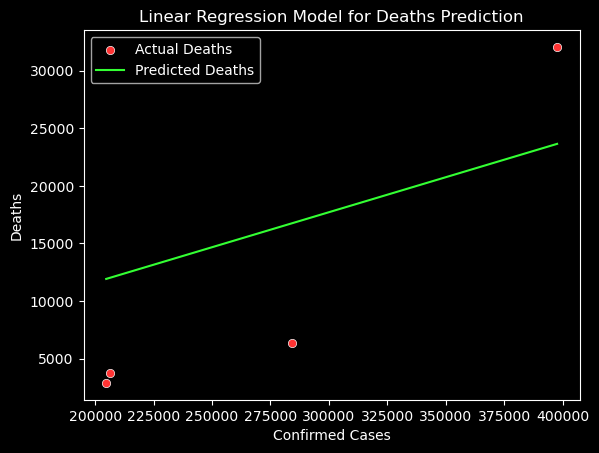

In [89]:
from sklearn.linear_model import LinearRegression

# Tạo DataFrame chứa dữ liệu của các bang còn lại để làm bộ data train mô hình
train_data = us_medical_data[~us_medical_data['province_state'].isin(['New York', 'Florida', 'Texas', 'California'])]
# Tạo DataFrame chứa dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình
test_data = us_medical_data[us_medical_data['province_state'].isin(['New York', 'Florida', 'Texas', 'California'])]

# Xác định features và target
X_train = train_data[['confirmed']]
y_train = train_data['deaths']
X_test = test_data[['confirmed']]
y_test = test_data['deaths']

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán số trường hợp Deaths cho các bang New York, Florida, Texas, California
predicted_deaths = model.predict(X_test)

# Trực quan hóa kết quả
sns.scatterplot(x=X_test['confirmed'], y=y_test, label='Actual Deaths', color = '#ff3333')                
sns.lineplot(x=X_test['confirmed'], y=predicted_deaths, color='#33ff33', label='Predicted Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Linear Regression Model for Deaths Prediction')
plt.legend()
plt.show()